In [58]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from scipy.stats import norm
import math as m
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py

In [59]:
# from google.colab import drive
# drive.mount('/content/gdrive/')
# import sys
# import os
# sys_path = '/content/gdrive/My Drive/'
# # modify "customized_path_to_your_homework" here to where you uploaded your homework
# sys.path.append(sys_path)

In [60]:
df = pd.read_csv('may-movie-data-final.csv')

In [61]:
# null values in each column
df.isnull().sum()

Movie Title                       0
tmdb_popularity                   0
imdbRating                        0
imdbNumVotes                      0
runtimeMinutes                    0
Score_Rotten                    247
Score_Rotten_Audience           185
Rating                            0
NumTheatres                     311
mean_google_trend_popularity     93
director_popularity             278
producer_popularity             243
actors_popularity                 8
TwitterScore                     65
Budget                            0
Action                            0
Adventure                         0
Animation                         0
Biography                         0
Comedy                            0
Crime                             0
Documentary                       0
Drama                             0
Family                            0
Fantasy                           0
Film-Noir                         0
History                           0
Horror                      

total null values

In [62]:
df.describe()

,tmdb_popularity,imdbRating,imdbNumVotes,runtimeMinutes,Score_Rotten,Score_Rotten_Audience,Rating,NumTheatres,mean_google_trend_popularity,director_popularity,...,Sport,Thriller,War,Western,Release-Year,Release-Month,Release-DOM,Revenue-Worldwide,Profit,Label
count,1618.000000,1618.000000,1.618000e+03,1618.000000,1371.000000,1433.000000,1618.000000,1307.000000,1525.000000,1340.000000,...,1618.000000,1618.000000,1618.000000,1618.000000,1572.000000,1572.000000,1572.000000,1.618000e+03,1618.000000,1618.000000
mean,90.629623,6.424475,1.511315e+05,111.852905,57.396791,62.952547,2.124227,68.172915,47.062295,7.091651,...,0.012979,0.152658,0.008035,0.004326,2015.278626,6.734733,16.218193,1.770335e+08,9.940162,0.833745
std,317.576346,0.973880,2.012969e+05,19.117367,27.049834,19.633741,0.682872,44.564705,15.983062,6.503903,...,0.113219,0.359768,0.089303,0.065653,3.407032,3.545143,8.366302,2.569134e+08,199.826489,0.886328
min,0.600000,1.600000,1.500000e+01,48.000000,0.000000,0.000000,0.000000,1.000000,12.500000,0.600000,...,0.000000,0.000000,0.000000,0.000000,2009.000000,1.000000,1.000000,1.440030e+05,-0.997019,0.000000
25%,18.383500,5.800000,2.527325e+04,98.000000,35.000000,48.000000,2.000000,31.000000,36.875000,2.835500,...,0.000000,0.000000,0.000000,0.000000,2012.000000,3.000000,9.000000,3.881412e+07,0.680118,0.000000
50%,35.766000,6.500000,8.444800e+04,109.000000,61.000000,64.000000,2.000000,63.000000,43.750000,5.452000,...,0.000000,0.000000,0.000000,0.000000,2015.000000,7.000000,17.000000,8.052874e+07,1.922937,1.000000
75%,79.029000,7.100000,1.896638e+05,123.000000,81.000000,80.000000,3.000000,101.000000,55.125000,8.616000,...,0.000000,0.000000,0.000000,0.000000,2018.000000,10.000000,23.000000,1.966145e+08,4.239644,2.000000
max,7358.500000,8.800000,2.255111e+06,212.000000,100.000000,100.000000,5.000000,199.000000,98.000000,39.917000,...,1.000000,1.000000,1.000000,1.000000,2022.000000,12.000000,31.000000,2.797801e+09,7999.000000,2.000000


In [63]:
li_movies = []
li_movies = df['Movie Title']

In [64]:
df.columns

Index(['Movie Title', 'tmdb_popularity', 'imdbRating', 'imdbNumVotes',
       'runtimeMinutes', 'Score_Rotten', 'Score_Rotten_Audience', 'Rating',
       'NumTheatres', 'mean_google_trend_popularity', 'director_popularity',
       'producer_popularity', 'actors_popularity', 'TwitterScore', 'Budget',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Short',
       'Sport', 'Thriller', 'War', 'Western', 'Release-Date', 'Release-Year',
       'Release-Month', 'Release-DOM', 'Revenue-Worldwide', 'Profit', 'Label'],
      dtype='object')

In [65]:
df = df.drop(['Movie Title'],axis = 1)

# Replacing Missing values - Mean values

In [66]:
df['Score_Rotten'] = df['Score_Rotten'].fillna(m.ceil(df['Score_Rotten'].mean()))
feature =  'Score_Rotten_Audience'
df[feature] = df[feature].fillna(m.ceil(df[feature].mean()))
feature =  'NumTheatres'
df[feature] = df[feature].fillna(m.ceil(df[feature].mean()))
feature =  'mean_google_trend_popularity'
df[feature] = df[feature].fillna(round(df[feature].mean(), 3))
feature =  'director_popularity'
df[feature] = df[feature].fillna(round(df[feature].mean(), 3))
feature =  'producer_popularity'
df[feature] = df[feature].fillna(round(df[feature].mean(), 3))
feature =  'actors_popularity'
df[feature] = df[feature].fillna(round(df[feature].mean(), 3))
feature =  'TwitterScore'
df[feature] = df[feature].fillna(round(df[feature].mean(), 3))
feature =  'Release-DOM'
df[feature] = df[feature].fillna(int(m.ceil(df[feature].mean())))
feature =  'Release-Month'
df[feature] = df[feature].fillna(int(m.ceil(df[feature].mean())))
feature =  'Release-Year'
df[feature] = df[feature].fillna(int(m.ceil(df[feature].mean())))
df.rename(columns = {'Release-Year':'year', 'Release-Month':'month', 'Release-DOM':'day'}, inplace = True)
df['Release-Date'] = pd.to_datetime(df[['year', 'month', 'day']])

In [67]:
li = []
li = df['Release-Date']
df = df.drop(['Release-Date'],axis = 1)

In [68]:
# release_li =[]
# for index, row in df.iterrows():
#   release_li.append(str(int(row['Release-Year']))+"-"+str(int(row['Release-Month']))+"-"+str(int(row['Release-DOM'])))

In [69]:
df = df.drop(['year','month','day'],axis=1)

In [70]:
print(li)

0      2018-10-31
1      2010-07-22
2      2021-04-02
3      2014-03-14
4      2011-04-23
          ...    
1613   2022-03-04
1614   2022-04-22
1615   2022-01-21
1616   2022-01-21
1617   2022-03-18
Name: Release-Date, Length: 1618, dtype: datetime64[ns]


In [71]:
df.rename(columns = {'Revenue-Worldwide':'Revenue'}, inplace = True)

In [72]:

# release_li= pd.to_datetime(release_li) #converting into panda date time

In [73]:
# release_df = {'release_date': release_li}
# release_df = pd.DataFrame(release_df)

In [74]:
#release_df = li.copy()
release_df= {'Release-Date':li.copy()}

In [75]:
def process_date(df_date):
    '''this function add column like 
     year, weeekday, month and so on column
    and add prefix of release_date before 
    all the above column eg realease_date_year'''
    date_parts = ["year", "weekday", "month", 'weekofyear', 'day', 'quarter']
    for part in date_parts:
        part_col = 'release_date' + "_" + part #add prefix as  "release_date" before the columne
        df[part_col] = getattr(release_df['Release-Date'].dt, part).astype(int)
    
    return df_date

In [76]:
df = process_date(df)

/state/partition1/job-18980707/ipykernel_1539304/2304649822.py:9: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



# Exploratory Data Analysis

/ext3/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



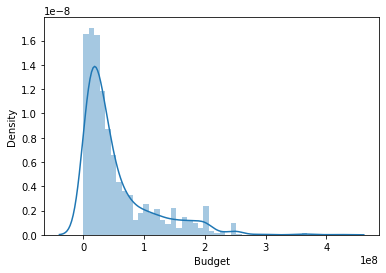

In [77]:
sns.distplot(df.Budget);

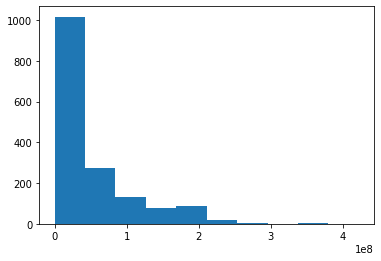

In [78]:
plt.hist(df['Budget']);

/ext3/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



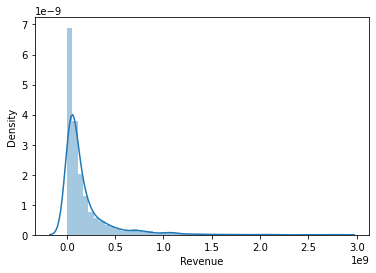

In [79]:
sns.distplot(df.Revenue);

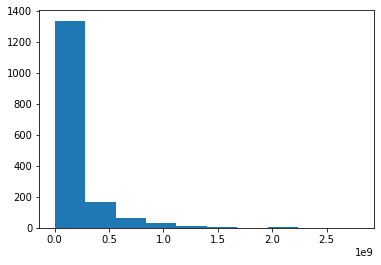

In [80]:
plt.hist(df['Revenue']);

/ext3/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



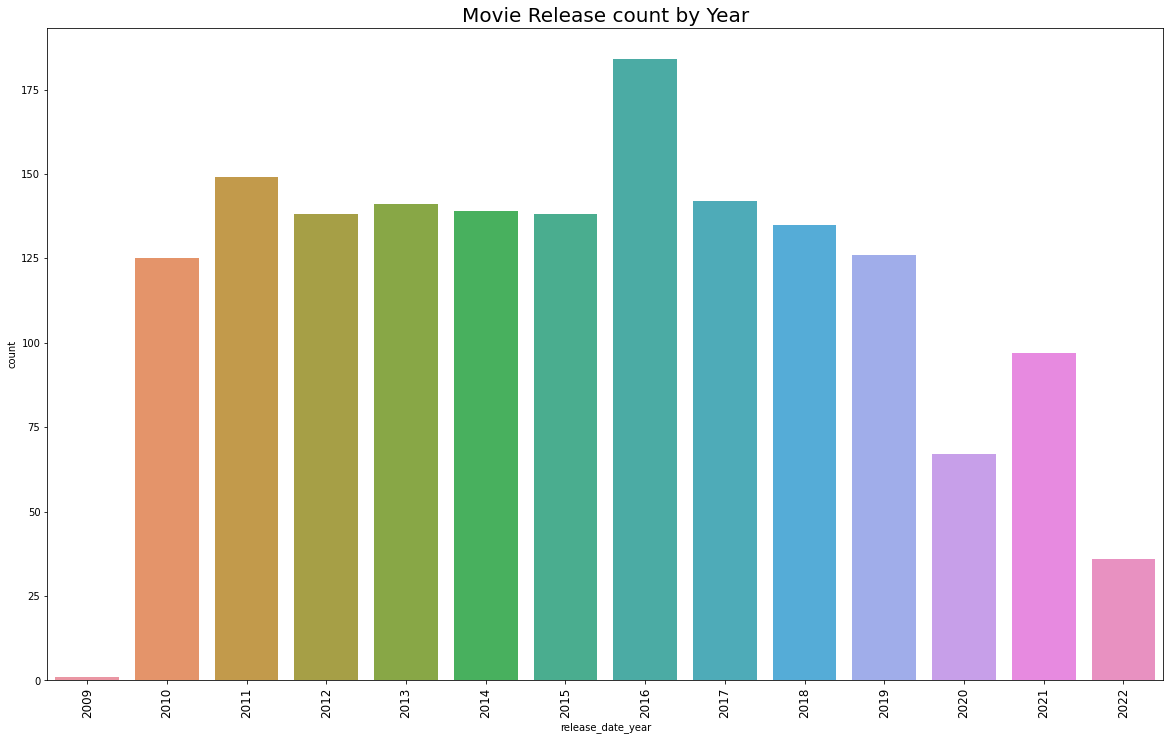

In [81]:
#countplot chart for movies release year
plt.figure(figsize=(20,12))
sns.countplot(df['release_date_year'].sort_values())
plt.title("Movie Release count by Year",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()

In [82]:
#plot for release date vs revenue
d1 = df['release_date_year'].value_counts().sort_index()
d2 = df.groupby(['release_date_year'])['Revenue'].mean()

data = [go.Scatter(x=d1.index, y=d1.values, name='film count'),
        go.Scatter(x=d2.index, y=d2.values, name='mean revenue', yaxis='y2')]

layout = go.Layout(dict(title = "Number of films and average revenue per year",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Count'),
                  yaxis2=dict(title='Average revenue', overlaying='y', side='right')
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

<Figure size 1440x360 with 0 Axes>

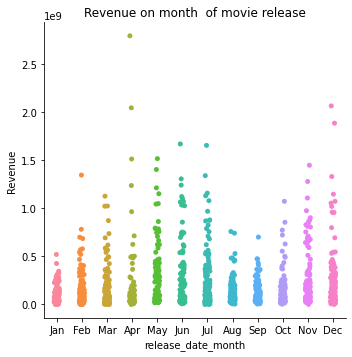

In [83]:
#since day, month are categorical variable
plt.figure(figsize=(20,5));
sns.catplot(x='release_date_month', y='Revenue', data=df);
plt.title('Revenue on month  of movie release');
#lets replace number by actual month name
loc, labels = plt.xticks()
loc, labels = loc, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(loc, labels,fontsize=10)
plt.show()

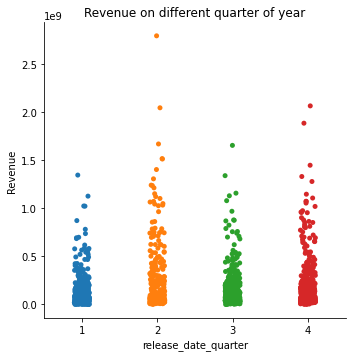

In [84]:
sns.catplot(x='release_date_quarter', y='Revenue', data=df);
plt.title('Revenue on different quarter of year');

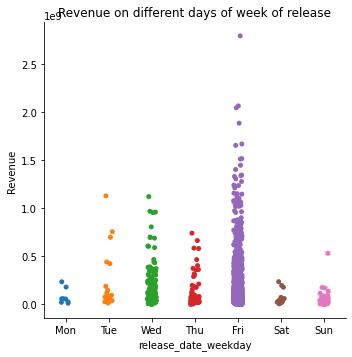

In [85]:
sns.catplot(x='release_date_weekday', y='Revenue', data=df);
plt.title('Revenue on different days of week of release');
loc, labels = plt.xticks()
#putting label for days
loc, labels = loc, ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
plt.xticks(loc, labels)
plt.show()

/ext3/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/ext3/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



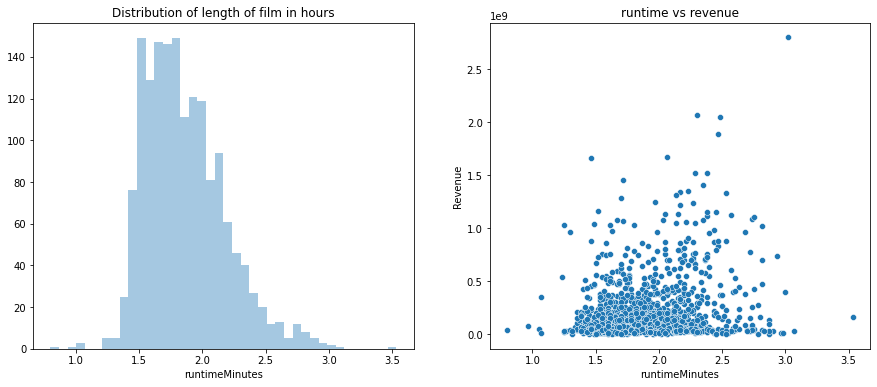

In [86]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.distplot(df['runtimeMinutes'].fillna(0) / 60, bins=40, kde=False); #filling runtime with 0 if there were any missing values
plt.title('Distribution of length of film in hours');
plt.subplot(1, 2, 2)
sns.scatterplot(df['runtimeMinutes'].fillna(0)/60, df['Revenue'])
plt.title('runtime vs revenue');

In [87]:
output = []
output = df['Revenue']

In [88]:
df.shape

(1618, 46)

In [89]:
df.columns

Index(['tmdb_popularity', 'imdbRating', 'imdbNumVotes', 'runtimeMinutes',
       'Score_Rotten', 'Score_Rotten_Audience', 'Rating', 'NumTheatres',
       'mean_google_trend_popularity', 'director_popularity',
       'producer_popularity', 'actors_popularity', 'TwitterScore', 'Budget',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Short',
       'Sport', 'Thriller', 'War', 'Western', 'Revenue', 'Profit', 'Label',
       'release_date_year', 'release_date_weekday', 'release_date_month',
       'release_date_weekofyear', 'release_date_day', 'release_date_quarter'],
      dtype='object')

# Dummy Encoding Categorical data

In [90]:
df_numeric = df.filter(['tmdb_popularity', 'imdbRating','imdbNumVotes','runtimeMinutes','Score_Rotten', 'Score_Rotten_Audience',
                                         'NumTheatres','mean_google_trend_popularity', 'director_popularity',
'producer_popularity', 'actors_popularity', 'TwitterScore', 'Budget','Revenue','Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Short',
       'Sport', 'Thriller', 'War', 'Western'],axis = 1)

In [91]:
df_numeric

,tmdb_popularity,imdbRating,imdbNumVotes,runtimeMinutes,Score_Rotten,Score_Rotten_Audience,NumTheatres,mean_google_trend_popularity,director_popularity,producer_popularity,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,2.791,6.6,160,100,58.0,82.0,69.0,41.250,1.164,4.82800,...,0,0,0,0,0,0,0,0,0,0
1,17.804,4.8,11745,89,100.0,63.0,69.0,60.625,7.092,0.64750,...,0,0,0,0,0,0,0,0,0,0
2,1.342,6.8,383,115,58.0,63.0,69.0,12.500,7.092,4.82800,...,0,0,0,0,0,0,0,0,0,0
3,0.948,5.3,85,93,58.0,63.0,69.0,29.750,7.092,0.60000,...,0,0,0,0,0,0,0,0,0,0
4,40.465,6.4,7731,130,58.0,58.0,69.0,46.625,5.113,1.55300,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,15.273,7.0,38061,152,91.0,97.0,55.0,61.250,1.367,0.98350,...,0,0,0,0,0,0,0,0,0,0
1614,708.384,7.0,1474,100,88.0,63.0,69.0,64.875,2.848,0.93700,...,0,0,0,0,0,0,0,0,0,0
1615,7.013,4.5,329,102,17.0,73.0,53.0,21.375,0.656,0.60000,...,0,0,0,0,0,0,0,0,0,0
1616,172.511,5.1,2689,90,18.0,80.0,43.0,55.000,7.761,2.67475,...,0,0,0,0,0,0,0,0,0,0


In [92]:
li_1 = []
li_1 = df['release_date_year']
li_2 = []
li_2 = df['Rating']
li_3 = []
li_3 = df['release_date_quarter']

In [93]:
df_category =  pd.DataFrame([],columns = ['release_date_year', 'Rating', 'release_date_quarter'])

In [94]:
df_category['release_date_year'] = df['release_date_year']
df_category['release_date_quarter'] = df['release_date_quarter']
df_category['Rating'] = df['Rating']

In [95]:
df_category.head()

,release_date_year,Rating,release_date_quarter
0,2018,2,4
1,2010,2,3
2,2021,2,2
3,2014,2,1
4,2011,2,2


In [96]:
one_hot_df = pd.get_dummies(df_category,columns = ['release_date_year',
                                        'Rating','release_date_quarter'], prefix={'release_date_year':'release_date_year_',
                                        'Rating':'Rating_',
                                        'release_date_quarter':'release_date_quarter_'},
                            drop_first=True)

In [97]:
one_hot_df

,release_date_year__2010,release_date_year__2011,release_date_year__2012,release_date_year__2013,release_date_year__2014,release_date_year__2015,release_date_year__2016,release_date_year__2017,release_date_year__2018,release_date_year__2019,...,release_date_year__2021,release_date_year__2022,Rating__1,Rating__2,Rating__3,Rating__4,Rating__5,release_date_quarter__2,release_date_quarter__3,release_date_quarter__4
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1614,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1615,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1616,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [98]:
df = pd.concat([one_hot_df,df_numeric],axis = 1)

In [99]:
df.columns

Index(['release_date_year__2010', 'release_date_year__2011',
       'release_date_year__2012', 'release_date_year__2013',
       'release_date_year__2014', 'release_date_year__2015',
       'release_date_year__2016', 'release_date_year__2017',
       'release_date_year__2018', 'release_date_year__2019',
       'release_date_year__2020', 'release_date_year__2021',
       'release_date_year__2022', 'Rating__1', 'Rating__2', 'Rating__3',
       'Rating__4', 'Rating__5', 'release_date_quarter__2',
       'release_date_quarter__3', 'release_date_quarter__4', 'tmdb_popularity',
       'imdbRating', 'imdbNumVotes', 'runtimeMinutes', 'Score_Rotten',
       'Score_Rotten_Audience', 'NumTheatres', 'mean_google_trend_popularity',
       'director_popularity', 'producer_popularity', 'actors_popularity',
       'TwitterScore', 'Budget', 'Revenue', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'History', 'H

In [100]:
df.isnull().sum()

release_date_year__2010         0
release_date_year__2011         0
release_date_year__2012         0
release_date_year__2013         0
release_date_year__2014         0
release_date_year__2015         0
release_date_year__2016         0
release_date_year__2017         0
release_date_year__2018         0
release_date_year__2019         0
release_date_year__2020         0
release_date_year__2021         0
release_date_year__2022         0
Rating__1                       0
Rating__2                       0
Rating__3                       0
Rating__4                       0
Rating__5                       0
release_date_quarter__2         0
release_date_quarter__3         0
release_date_quarter__4         0
tmdb_popularity                 0
imdbRating                      0
imdbNumVotes                    0
runtimeMinutes                  0
Score_Rotten                    0
Score_Rotten_Audience           0
NumTheatres                     0
mean_google_trend_popularity    0
director_popul

In [101]:
len(df.columns)

58

In [102]:
# Add movies
# new_df = df.copy()
# new_df['Movie Title'] = li_movies
# new_df.shape
# new_df.to_csv("FinalDataset.csv")

# Detecting outliers with DBSCAN

In [103]:
from scipy import stats

In [104]:
df.dtypes

release_date_year__2010           uint8
release_date_year__2011           uint8
release_date_year__2012           uint8
release_date_year__2013           uint8
release_date_year__2014           uint8
release_date_year__2015           uint8
release_date_year__2016           uint8
release_date_year__2017           uint8
release_date_year__2018           uint8
release_date_year__2019           uint8
release_date_year__2020           uint8
release_date_year__2021           uint8
release_date_year__2022           uint8
Rating__1                         uint8
Rating__2                         uint8
Rating__3                         uint8
Rating__4                         uint8
Rating__5                         uint8
release_date_quarter__2           uint8
release_date_quarter__3           uint8
release_date_quarter__4           uint8
tmdb_popularity                 float64
imdbRating                      float64
imdbNumVotes                      int64
runtimeMinutes                    int64


In [105]:
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

In [106]:
print(df.shape, new_df.shape)

(1618, 58) (101, 58)


In [107]:
print("Num outliers:", 1618-751)

Num outliers: 867


No of outliers are 867

# Using DB SCAN for outlier

[[0.00000000e+00 2.04105150e+04 1.54966278e+05 ... 6.43829985e+06
  6.45762623e+06 6.55560531e+06]
 [0.00000000e+00 2.04105150e+04 2.03135912e+05 ... 6.44768762e+06
  6.46099945e+06 6.55976757e+06]
 [0.00000000e+00 3.34828091e+04 2.07600690e+05 ... 6.48860452e+06
  6.50694346e+06 6.56901755e+06]
 ...
 [1.13137085e+01 1.74832817e+08 1.88985275e+08 ... 1.36249175e+09
  1.36576161e+09 1.36966028e+09]
 [1.60000000e+01 1.85757009e+08 2.02878781e+08 ... 1.37714581e+09
  1.38063558e+09 1.38112127e+09]
 [3.20000000e+01 7.37972579e+08 7.51530125e+08 ... 2.11364543e+09
  2.11698679e+09 2.11897235e+09]]
[2.04105150e+04 2.04105150e+04 3.34828091e+04 ... 1.74832817e+08
 1.85757009e+08 7.37972579e+08]


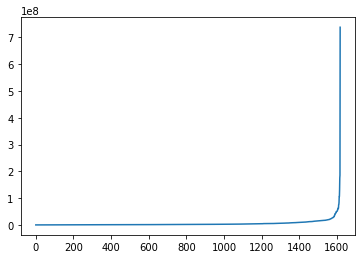

In [108]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
neighbors = NearestNeighbors(n_neighbors=88)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)
distances = np.sort(distances, axis=0)
print(distances)
distances = distances[:,1]
print(distances)
plt.plot(distances)

(10000000.0, 100000000.0)

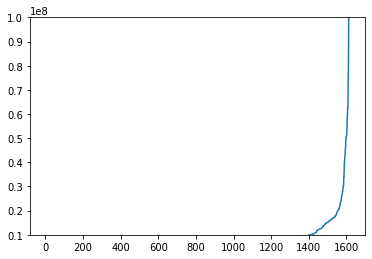

In [109]:
plt.plot(distances)

plt.ylim([10000000,100000000])

## epsilon can be taken as 25000000

In [110]:
from sklearn.cluster import DBSCAN

outlier_detection = DBSCAN(eps =25000000, min_samples=30).fit(df)
print(len(outlier_detection.labels_))
n_outliers = np.count_nonzero(outlier_detection.labels_==-1)
print(n_outliers)

1618
392


In [111]:
ind_list = []
i = 0
lisi_out = np.array(outlier_detection.labels_)
print(type(lisi_out))
for val in lisi_out:
    if val == -1:
        ind_list.append(i)
    i+=1
print(len(ind_list))

<class 'numpy.ndarray'>
392


In [112]:
df_copy = df.copy()
df['Movie Title'] = li_movies
df.columns
df_new = df.drop(ind_list, axis=0)
df_new.columns
df = df_new.copy()
li_movies_new = df_new['Movie Title']
df = df_new.drop('Movie Title', axis=1)

# Normalizing data

# Z-score normalization

In [113]:
z_df=(df-df.mean())/df.std()

In [114]:
z_df[z_df.columns[1:]].corr()['Revenue'][:].nlargest(n=44)

Revenue                         1.000000
Budget                          0.461923
imdbNumVotes                    0.440241
actors_popularity               0.312561
producer_popularity             0.158831
director_popularity             0.154559
imdbRating                      0.135531
Adventure                       0.132186
tmdb_popularity                 0.100259
Rating__1                       0.090804
release_date_quarter__4         0.089601
Animation                       0.079528
Action                          0.071350
Score_Rotten_Audience           0.060835
release_date_year__2014         0.053409
release_date_year__2011         0.052099
mean_google_trend_popularity    0.044538
Rating__5                       0.043551
Fantasy                         0.042283
Comedy                          0.041816
Score_Rotten                    0.041568
release_date_year__2012         0.038853
release_date_year__2013         0.038392
Rating__3                       0.033855
release_date_yea

/ext3/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



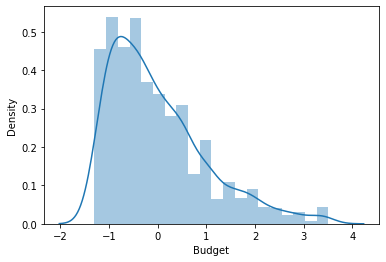

In [115]:
sns.distplot(z_df.Budget);

/ext3/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



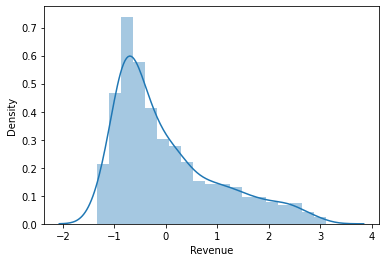

In [116]:
sns.distplot(z_df.Revenue);

/ext3/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



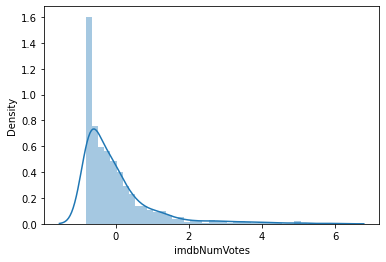

In [117]:
sns.distplot(z_df.imdbNumVotes);

In [118]:
z_df.describe()

,release_date_year__2010,release_date_year__2011,release_date_year__2012,release_date_year__2013,release_date_year__2014,release_date_year__2015,release_date_year__2016,release_date_year__2017,release_date_year__2018,release_date_year__2019,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
count,1.226000e+03,1.226000e+03,1.226000e+03,1226.000000,1.226000e+03,1.226000e+03,1.226000e+03,1.226000e+03,1226.000000,1226.000000,...,1.226000e+03,1.226000e+03,1.226000e+03,1.226000e+03,1.226000e+03,1.226000e+03,1.226000e+03,1.226000e+03,1.226000e+03,1226.000000
mean,2.318247e-17,4.636494e-17,9.272988e-17,0.000000,1.159124e-17,1.159124e-16,5.795618e-17,-1.390948e-16,0.000000,0.000000,...,-4.926275e-17,-5.795618e-18,2.318247e-17,5.795618e-18,3.477371e-17,8.693427e-18,2.318247e-17,6.954741e-17,-1.883576e-17,0.000000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
min,-2.813552e-01,-3.307763e-01,-3.106803e-01,-0.302727,-3.075153e-01,-2.995072e-01,-3.689528e-01,-3.011201e-01,-0.296264,-0.284715,...,-1.738604e-01,-8.596047e-02,-3.307763e-01,-4.160102e-01,-2.186875e-01,-2.855977e-02,-1.254140e-01,-4.400116e-01,-9.938117e-02,-0.057190
25%,-2.813552e-01,-3.307763e-01,-3.106803e-01,-0.302727,-3.075153e-01,-2.995072e-01,-3.689528e-01,-3.011201e-01,-0.296264,-0.284715,...,-1.738604e-01,-8.596047e-02,-3.307763e-01,-4.160102e-01,-2.186875e-01,-2.855977e-02,-1.254140e-01,-4.400116e-01,-9.938117e-02,-0.057190
50%,-2.813552e-01,-3.307763e-01,-3.106803e-01,-0.302727,-3.075153e-01,-2.995072e-01,-3.689528e-01,-3.011201e-01,-0.296264,-0.284715,...,-1.738604e-01,-8.596047e-02,-3.307763e-01,-4.160102e-01,-2.186875e-01,-2.855977e-02,-1.254140e-01,-4.400116e-01,-9.938117e-02,-0.057190
75%,-2.813552e-01,-3.307763e-01,-3.106803e-01,-0.302727,-3.075153e-01,-2.995072e-01,-3.689528e-01,-3.011201e-01,-0.296264,-0.284715,...,-1.738604e-01,-8.596047e-02,-3.307763e-01,-4.160102e-01,-2.186875e-01,-2.855977e-02,-1.254140e-01,-4.400116e-01,-9.938117e-02,-0.057190
max,3.551327e+00,3.020726e+00,3.216117e+00,3.300609,3.249218e+00,3.336095e+00,2.708163e+00,3.318225e+00,3.372618,3.509421,...,5.747051e+00,1.162377e+01,3.020726e+00,2.401827e+00,4.569006e+00,3.498572e+01,7.967089e+00,2.270814e+00,1.005406e+01,17.471429


# MIN-MAX Normalization

In [119]:
df.columns

Index(['release_date_year__2010', 'release_date_year__2011',
       'release_date_year__2012', 'release_date_year__2013',
       'release_date_year__2014', 'release_date_year__2015',
       'release_date_year__2016', 'release_date_year__2017',
       'release_date_year__2018', 'release_date_year__2019',
       'release_date_year__2020', 'release_date_year__2021',
       'release_date_year__2022', 'Rating__1', 'Rating__2', 'Rating__3',
       'Rating__4', 'Rating__5', 'release_date_quarter__2',
       'release_date_quarter__3', 'release_date_quarter__4', 'tmdb_popularity',
       'imdbRating', 'imdbNumVotes', 'runtimeMinutes', 'Score_Rotten',
       'Score_Rotten_Audience', 'NumTheatres', 'mean_google_trend_popularity',
       'director_popularity', 'producer_popularity', 'actors_popularity',
       'TwitterScore', 'Budget', 'Revenue', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'History', 'H

In [120]:
mm_df=(df-df.min())/(df.max()-df.min())

In [121]:
mm_df.describe()

,release_date_year__2010,release_date_year__2011,release_date_year__2012,release_date_year__2013,release_date_year__2014,release_date_year__2015,release_date_year__2016,release_date_year__2017,release_date_year__2018,release_date_year__2019,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
count,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,...,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000
mean,0.073409,0.098695,0.088091,0.084013,0.086460,0.082382,0.119902,0.083197,0.080750,0.075041,...,0.029364,0.007341,0.098695,0.147635,0.045677,0.000816,0.015498,0.162316,0.009788,0.003263
std,0.260914,0.298374,0.283543,0.277521,0.281157,0.275058,0.324980,0.276293,0.272563,0.263565,...,0.168893,0.085399,0.298374,0.354882,0.208869,0.028560,0.123571,0.368891,0.098489,0.057050
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/ext3/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



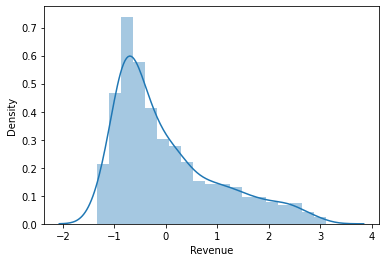

In [122]:
sns.distplot(z_df.Revenue);

In [123]:
mm_df[mm_df.columns[1:]].corr()['Revenue'][:].nlargest(n=46)

Revenue                         1.000000
Budget                          0.461923
imdbNumVotes                    0.440241
actors_popularity               0.312561
producer_popularity             0.158831
director_popularity             0.154559
imdbRating                      0.135531
Adventure                       0.132186
tmdb_popularity                 0.100259
Rating__1                       0.090804
release_date_quarter__4         0.089601
Animation                       0.079528
Action                          0.071350
Score_Rotten_Audience           0.060835
release_date_year__2014         0.053409
release_date_year__2011         0.052099
mean_google_trend_popularity    0.044538
Rating__5                       0.043551
Fantasy                         0.042283
Comedy                          0.041816
Score_Rotten                    0.041568
release_date_year__2012         0.038853
release_date_year__2013         0.038392
Rating__3                       0.033855
release_date_yea

/ext3/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



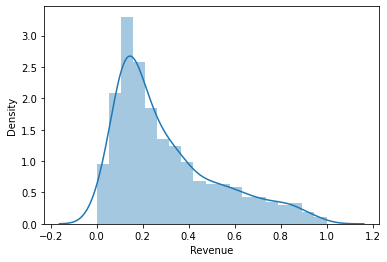

In [124]:
sns.distplot(mm_df.Revenue);

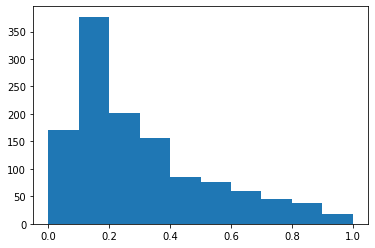

In [125]:
plt.hist(mm_df['Revenue']);

In [126]:
mm_df['Budget']

0       0.004263
1       0.019179
2       0.001699
3       0.028891
4       0.015664
          ...   
1612    0.043943
1613    0.209323
1615    0.096868
1616    0.388201
1617    0.232824
Name: Budget, Length: 1226, dtype: float64

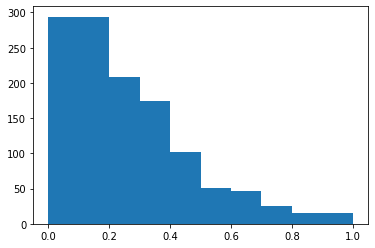

In [127]:
plt.hist(mm_df['Budget']);

/ext3/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



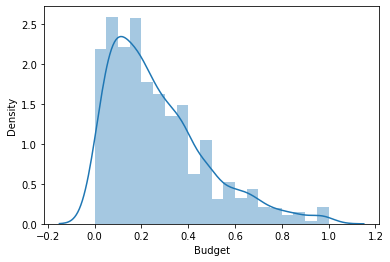

In [128]:
sns.distplot(mm_df.Budget);

/ext3/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



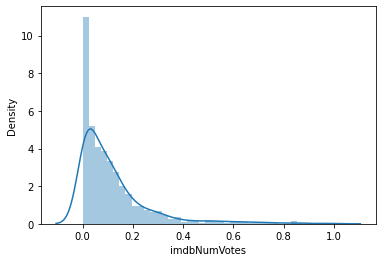

In [129]:
sns.distplot(mm_df.imdbNumVotes);

In [130]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
from pandas.plotting import scatter_matrix

# Standardization

In [131]:
scaler = StandardScaler()
scaler.fit(df)
X_scale = scaler.transform(df)
df_scale = pd.DataFrame(X_scale, columns=df.columns)
df_scale.head()

,release_date_year__2010,release_date_year__2011,release_date_year__2012,release_date_year__2013,release_date_year__2014,release_date_year__2015,release_date_year__2016,release_date_year__2017,release_date_year__2018,release_date_year__2019,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,-0.281470,-0.330911,-0.310807,-0.302851,-0.307641,-0.299629,-0.369103,-0.301243,3.373994,-0.284831,...,-0.173931,-0.085996,-0.330911,-0.41618,-0.218777,-0.028571,-0.125465,-0.440191,-0.099422,-0.057213
1,3.552777,-0.330911,-0.310807,-0.302851,-0.307641,-0.299629,-0.369103,-0.301243,-0.296385,-0.284831,...,-0.173931,-0.085996,-0.330911,-0.41618,-0.218777,-0.028571,-0.125465,-0.440191,-0.099422,-0.057213
2,-0.281470,-0.330911,-0.310807,-0.302851,-0.307641,-0.299629,-0.369103,-0.301243,-0.296385,-0.284831,...,-0.173931,-0.085996,-0.330911,-0.41618,-0.218777,-0.028571,-0.125465,-0.440191,-0.099422,-0.057213
3,-0.281470,-0.330911,-0.310807,-0.302851,3.250544,-0.299629,-0.369103,-0.301243,-0.296385,-0.284831,...,-0.173931,-0.085996,-0.330911,-0.41618,-0.218777,-0.028571,-0.125465,-0.440191,-0.099422,-0.057213
4,-0.281470,3.021958,-0.310807,-0.302851,-0.307641,-0.299629,-0.369103,-0.301243,-0.296385,-0.284831,...,-0.173931,-0.085996,-0.330911,-0.41618,4.570871,-0.028571,-0.125465,-0.440191,-0.099422,-0.057213


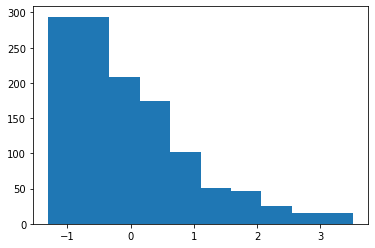

In [132]:
plt.hist(df_scale['Budget']);

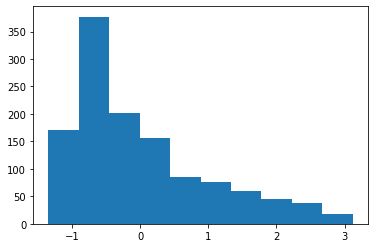

In [133]:
plt.hist(df_scale['Revenue']);

# MIN-MAX SCALER

In [134]:
scaler = MinMaxScaler()
scaler.fit(df)
X_scale = scaler.transform(df)
df_scale_mm = pd.DataFrame(X_scale, columns=df.columns)
df_scale_mm.head()

,release_date_year__2010,release_date_year__2011,release_date_year__2012,release_date_year__2013,release_date_year__2014,release_date_year__2015,release_date_year__2016,release_date_year__2017,release_date_year__2018,release_date_year__2019,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


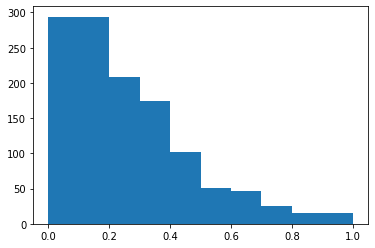

In [135]:
plt.hist(df_scale_mm['Budget']);

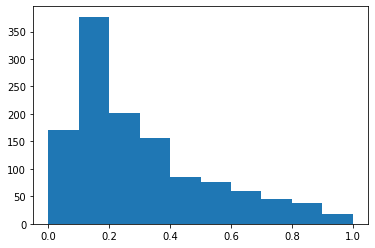

In [136]:
plt.hist(df_scale_mm['Revenue']);

# Feature Selection**

In [137]:
import joblib
import sys

sys.modules['sklearn.externals.joblib'] = joblib

In [138]:
normalized_df = mm_df.copy()

In [139]:
normalized_df.columns

Index(['release_date_year__2010', 'release_date_year__2011',
       'release_date_year__2012', 'release_date_year__2013',
       'release_date_year__2014', 'release_date_year__2015',
       'release_date_year__2016', 'release_date_year__2017',
       'release_date_year__2018', 'release_date_year__2019',
       'release_date_year__2020', 'release_date_year__2021',
       'release_date_year__2022', 'Rating__1', 'Rating__2', 'Rating__3',
       'Rating__4', 'Rating__5', 'release_date_quarter__2',
       'release_date_quarter__3', 'release_date_quarter__4', 'tmdb_popularity',
       'imdbRating', 'imdbNumVotes', 'runtimeMinutes', 'Score_Rotten',
       'Score_Rotten_Audience', 'NumTheatres', 'mean_google_trend_popularity',
       'director_popularity', 'producer_popularity', 'actors_popularity',
       'TwitterScore', 'Budget', 'Revenue', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'History', 'H

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [141]:
normalized_df['Movie Title'] = li_movies
normalized_df.columns, len(normalized_df.columns)

(Index(['release_date_year__2010', 'release_date_year__2011',
        'release_date_year__2012', 'release_date_year__2013',
        'release_date_year__2014', 'release_date_year__2015',
        'release_date_year__2016', 'release_date_year__2017',
        'release_date_year__2018', 'release_date_year__2019',
        'release_date_year__2020', 'release_date_year__2021',
        'release_date_year__2022', 'Rating__1', 'Rating__2', 'Rating__3',
        'Rating__4', 'Rating__5', 'release_date_quarter__2',
        'release_date_quarter__3', 'release_date_quarter__4', 'tmdb_popularity',
        'imdbRating', 'imdbNumVotes', 'runtimeMinutes', 'Score_Rotten',
        'Score_Rotten_Audience', 'NumTheatres', 'mean_google_trend_popularity',
        'director_popularity', 'producer_popularity', 'actors_popularity',
        'TwitterScore', 'Budget', 'Revenue', 'Action', 'Adventure', 'Animation',
        'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
        'Fantasy', 'Film-Noir'

In [142]:
new_normalized_df = normalized_df.drop(labels=['Revenue'], axis=1)
new_normalized_df['Revenue'] = df['Revenue']

In [143]:
#new_normalized_df.to_csv("normalized_df.csv")

In [144]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    normalized_df.drop(labels=['Revenue'], axis=1),
    df['Revenue'],
    test_size=0.2,
    random_state=0)

X_train.shape, X_test.shape

((980, 58), (246, 58))

In [145]:
# information of movie title retention
X_test_movies = X_test.copy()
X_train_movies = X_train.copy()

X_test = X_test.drop('Movie Title', axis=1)
X_train =  X_train.drop('Movie Title', axis=1)

In [146]:
# find and remove correlated features
# in order to reduce the feature space a bit
# so that the algorithm takes shorter

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  0


In [147]:
print(corr_features)

set()


In [148]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((980, 57), (246, 57))

# Random Forest Regressor for Feature Selection

In [149]:
# step forward feature selection
# Select 10 features based on optimal ROC_AUC scoring criteria

sfs1 = SFS(RandomForestRegressor(), 
           k_features=20, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)


In [150]:
sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:   16.8s finished

[2022-05-04 00:11:06] Features: 1/20 -- score: 1.6346183307511344e-01[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:   20.8s finished

[2022-05-04 00:11:27] Features: 2/20 -- score: 0.2871983919732946[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:   26.8s finished

[2022-05-04 00:11:54] Features: 3/20 -- score: 0.43001413750750644[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: D

In [151]:
selected_feat= X_train.columns[list(sfs1.k_feature_idx_)]
selected_feat

Index(['release_date_year__2014', 'release_date_year__2016',
       'release_date_year__2020', 'release_date_year__2021',
       'release_date_year__2022', 'Rating__3', 'release_date_quarter__3',
       'release_date_quarter__4', 'imdbNumVotes', 'NumTheatres', 'Budget',
       'Adventure', 'Animation', 'Comedy', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Sport'],
      dtype='object')

# Sequential backward selection

In [152]:
# step backward feature selection
# Using 15 features with ROC_AUC scoring

sfs_backward = SFS(RandomForestRegressor(), 
           k_features=23, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs_backward = sfs_backward.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:  1.7min finished

[2022-05-04 00:22:09] Features: 56/23 -- score: 0.5457031730688365[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:  1.7min finished

[2022-05-04 00:23:48] Features: 55/23 -- score: 0.5437357265178634[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:  1.7min finished

[2022-05-04 00:25:28] Features: 54/23 -- score: 0.5468965410308161[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   26.3s finished

[2022-05-04 00:47:15] Features: 29/23 -- score: 0.5741372431998141[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:   25.2s finished

[2022-05-04 00:47:40] Features: 28/23 -- score: 0.5746599060624403[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   24.0s finished

[2022-05-04 00:48:04] Features: 27/23 -- score: 0.5807735932299116[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   22.8s finished

[2022-05-04 00:48:27] Features: 26/

In [153]:
selected_feat_backward= X_train.columns[list(sfs1.k_feature_idx_)]
selected_feat_backward

Index(['release_date_year__2014', 'release_date_year__2016',
       'release_date_year__2020', 'release_date_year__2021',
       'release_date_year__2022', 'Rating__3', 'release_date_quarter__3',
       'release_date_quarter__4', 'imdbNumVotes', 'NumTheatres', 'Budget',
       'Adventure', 'Animation', 'Comedy', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Sport'],
      dtype='object')

# Exhaustive search feature selection : takes a long long time

In [154]:
# from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [155]:
# exhaustive search
# efs1 = EFS(RandomForestRegressor(), 
#            min_features=1,
#            max_features=20, 
#            scoring='r2',
#            print_progress=True,
#            cv=2)

# efs1 = efs1.fit(np.array(X_train), y_train)

In [156]:
#X_train.columns[list(efs1.best_idx_)]

# Mutual Information method

In [157]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [158]:
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([5.79249161e-03, 7.75727247e-03, 1.42970804e-02, 0.00000000e+00,
       6.31011501e-03, 8.07509001e-03, 0.00000000e+00, 3.54485823e-03,
       3.88032049e-03, 9.62368025e-03, 4.89409903e-02, 1.95551093e-02,
       3.33639236e-02, 0.00000000e+00, 2.45711913e-02, 1.79976463e-03,
       0.00000000e+00, 3.40136054e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.30974357e-01, 8.59766397e-03, 1.38721002e-01,
       0.00000000e+00, 4.99072189e-02, 1.54297520e-02, 2.60929271e-01,
       6.32935744e-02, 3.24828483e-02, 5.21056537e-02, 7.45203327e-02,
       9.30778818e-02, 1.22857819e-01, 2.50566617e-02, 6.44201196e-03,
       4.47422739e-03, 0.00000000e+00, 0.00000000e+00, 1.25875544e-02,
       2.62012145e-03, 0.00000000e+00, 0.00000000e+00, 6.69311839e-03,
       2.99760217e-15, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.70615078e-04, 0.00000000e+00, 1.44285267e-03, 0.00000000e+00,
       0.00000000e+00, 1.42657601e-03, 3.58132542e-03, 0.00000000e+00,
      

In [159]:
# Create Feature Target Mutual Information Series
mi_series = pd.Series(mutual_info)
mi_series.index = X_train.columns
mi_series.sort_values(ascending=False)

NumTheatres                     2.609293e-01
imdbNumVotes                    1.387210e-01
tmdb_popularity                 1.309744e-01
Budget                          1.228578e-01
TwitterScore                    9.307788e-02
actors_popularity               7.452033e-02
mean_google_trend_popularity    6.329357e-02
producer_popularity             5.210565e-02
Score_Rotten                    4.990722e-02
release_date_year__2020         4.894099e-02
release_date_year__2022         3.336392e-02
director_popularity             3.248285e-02
Action                          2.505666e-02
Rating__2                       2.457119e-02
release_date_year__2021         1.955511e-02
Score_Rotten_Audience           1.542975e-02
release_date_year__2012         1.429708e-02
Crime                           1.258755e-02
release_date_year__2019         9.623680e-03
imdbRating                      8.597664e-03
release_date_year__2015         8.075090e-03
release_date_year__2011         7.757272e-03
Fantasy   

<AxesSubplot:>

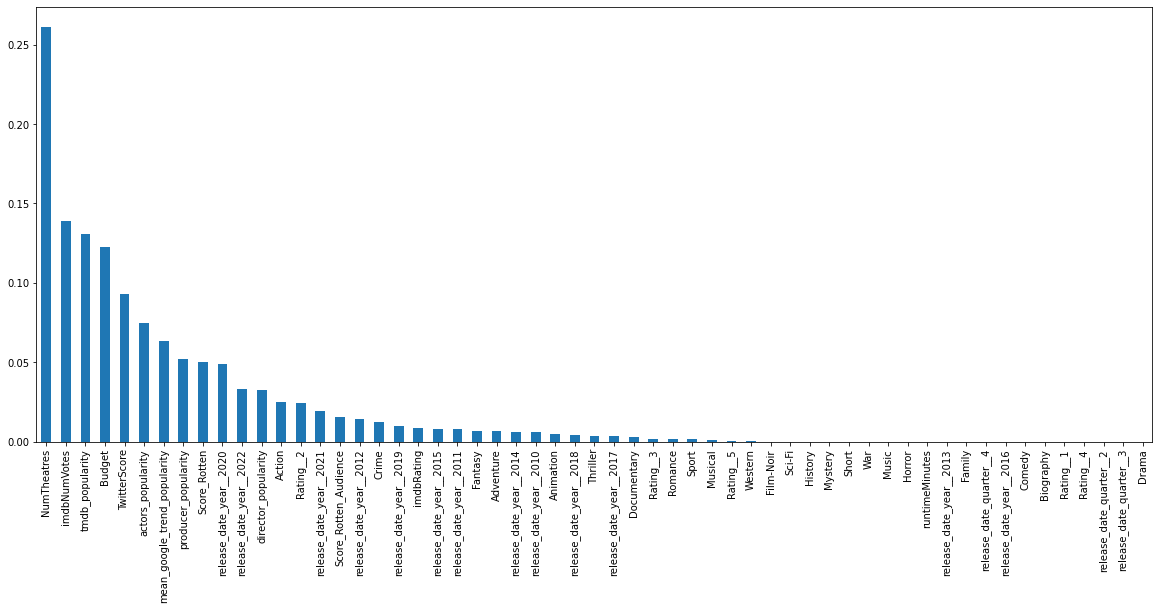

In [160]:
mi_series.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [161]:
# Select K best features
k_percentile_features = SelectPercentile(mutual_info_classif, percentile=25).fit(X_train, y_train)
print('Selected top 10 percentile features: {}'.format(X_train.columns[k_percentile_features.get_support()]))

Selected top 10 percentile features: Index(['release_date_year__2010', 'release_date_year__2011',
       'release_date_year__2012', 'release_date_year__2013',
       'release_date_year__2014', 'release_date_year__2015',
       'release_date_year__2016', 'release_date_year__2017',
       'release_date_year__2018', 'release_date_year__2019',
       'release_date_year__2020', 'release_date_year__2021',
       'release_date_year__2022', 'Rating__1'],
      dtype='object')


# Fischer Score: Chi Square

In [162]:
from sklearn.feature_selection import chi2
# Calcualte the Fisher Score (chi2) between each feature and target
fisher_score = chi2(X_train.fillna(0), y_train)
#fisher_score

In [163]:
p_values = pd.Series(fisher_score[1])
p_values.index = X_train.columns
p_values.sort_values(ascending=False)

mean_google_trend_popularity    1.000000
Score_Rotten_Audience           1.000000
tmdb_popularity                 1.000000
Comedy                          1.000000
imdbRating                      1.000000
Rating__2                       1.000000
imdbNumVotes                    1.000000
Drama                           1.000000
runtimeMinutes                  1.000000
Score_Rotten                    1.000000
NumTheatres                     1.000000
director_popularity             1.000000
producer_popularity             1.000000
actors_popularity               1.000000
TwitterScore                    1.000000
Budget                          1.000000
Rating__3                       1.000000
Action                          1.000000
release_date_quarter__3         1.000000
release_date_quarter__4         1.000000
Adventure                       0.999998
release_date_quarter__2         0.999946
Crime                           0.999918
Thriller                        0.999890
Romance         

# Feature Selection-Constant Feature Elimination

In [164]:
from sklearn.feature_selection import VarianceThreshold
# Remove constant features using VarianceThreshold
feature_selector = VarianceThreshold(threshold=0)

# Fit finds the features with zero variance
feature_selector.fit(X_train)
# Get Feature Support
# Returns True if value is not constant else False
feature_selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [165]:
# Number of Features that are not constant
sum(feature_selector.get_support())

56

In [166]:
# Features that are constant
[x for x in X_train.columns if x not in X_train.columns[feature_selector.get_support()]]

['Film-Noir']

# Basic Correlation

In [167]:
# Build a Dataframe with Correlation between Features
corr_matrix = X_train.corr()
# Take absolute values of correlated coefficients
corr_matrix = corr_matrix.abs().unstack()
corr_matrix = corr_matrix.sort_values(ascending=False)
#Take only features with correlation above threshold of 0.8
corr_matrix = corr_matrix[corr_matrix >= 0.6]
corr_matrix = corr_matrix[corr_matrix < 1]
corr_matrix = pd.DataFrame(corr_matrix).reset_index()
corr_matrix.columns = ['feature1', 'feature2', 'Correlation']
corr_matrix
# corr_matrix.head()

,feature1,feature2,Correlation
0,Rating__3,Rating__2,0.770783
1,Rating__2,Rating__3,0.770783
2,imdbRating,Score_Rotten_Audience,0.630270
3,Score_Rotten_Audience,imdbRating,0.630270
4,imdbRating,Score_Rotten,0.626284
5,Score_Rotten,imdbRating,0.626284
6,Score_Rotten_Audience,Score_Rotten,0.625810
7,Score_Rotten,Score_Rotten_Audience,0.625810


In [168]:
# Get groups of features that are correlated amongs themselves
grouped_features = []
correlated_groups = []

for feature in corr_matrix.feature1.unique():
    if feature not in grouped_features:
        # Find all features correlated to a single feature
        correlated_block = corr_matrix[corr_matrix.feature1 == feature]
        grouped_features = grouped_features + list(correlated_block.feature2.unique()) + [feature]
        
        # Append block of features to the list
        correlated_groups.append(correlated_block)

print('Found {} correlated feature groups'.format(len(correlated_groups)))
print('out of {} total features.'.format(X_train.shape[1]))
print(correlated_groups)

Found 2 correlated feature groups
out of 57 total features.
[    feature1   feature2  Correlation
0  Rating__3  Rating__2     0.770783,      feature1               feature2  Correlation
2  imdbRating  Score_Rotten_Audience     0.630270
4  imdbRating           Score_Rotten     0.626284]


In [169]:
# Visualize Correlated Feature Groups
for group in correlated_groups:
    print(group)
    print('\n')

    feature1   feature2  Correlation
0  Rating__3  Rating__2     0.770783


     feature1               feature2  Correlation
2  imdbRating  Score_Rotten_Audience     0.630270
4  imdbRating           Score_Rotten     0.626284




# ML without Reducing Features

In [170]:
#training the model
print(normalized_df.columns)
X = normalized_df.drop(['Revenue'], axis=1)
y= df['Revenue'] #prediction
print(X.shape, y.shape)

Index(['release_date_year__2010', 'release_date_year__2011',
       'release_date_year__2012', 'release_date_year__2013',
       'release_date_year__2014', 'release_date_year__2015',
       'release_date_year__2016', 'release_date_year__2017',
       'release_date_year__2018', 'release_date_year__2019',
       'release_date_year__2020', 'release_date_year__2021',
       'release_date_year__2022', 'Rating__1', 'Rating__2', 'Rating__3',
       'Rating__4', 'Rating__5', 'release_date_quarter__2',
       'release_date_quarter__3', 'release_date_quarter__4', 'tmdb_popularity',
       'imdbRating', 'imdbNumVotes', 'runtimeMinutes', 'Score_Rotten',
       'Score_Rotten_Audience', 'NumTheatres', 'mean_google_trend_popularity',
       'director_popularity', 'producer_popularity', 'actors_popularity',
       'TwitterScore', 'Budget', 'Revenue', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'History', 'H

In [171]:
normalized_df

,release_date_year__2010,release_date_year__2011,release_date_year__2012,release_date_year__2013,release_date_year__2014,release_date_year__2015,release_date_year__2016,release_date_year__2017,release_date_year__2018,release_date_year__2019,...,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,Movie Title
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Intimate Strangers
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aftershock
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,The Eleventh Chapter
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Spanish Affair
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Gantz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Badhaai Do
1613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gangubai Kathiawadi
1615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,The Tiger Rising
1616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,The King's Daughter


In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
X_movies_train = X_train.copy()
X_movies_test = X_test.copy()
y_movies_train = y_train.copy()
y_movies_test = y_test.copy()
X_train = X_train.drop("Movie Title", axis=1)
X_test = X_test.drop("Movie Title", axis=1)

In [173]:
print(len(X_train.columns))
X_train.columns

57


Index(['release_date_year__2010', 'release_date_year__2011',
       'release_date_year__2012', 'release_date_year__2013',
       'release_date_year__2014', 'release_date_year__2015',
       'release_date_year__2016', 'release_date_year__2017',
       'release_date_year__2018', 'release_date_year__2019',
       'release_date_year__2020', 'release_date_year__2021',
       'release_date_year__2022', 'Rating__1', 'Rating__2', 'Rating__3',
       'Rating__4', 'Rating__5', 'release_date_quarter__2',
       'release_date_quarter__3', 'release_date_quarter__4', 'tmdb_popularity',
       'imdbRating', 'imdbNumVotes', 'runtimeMinutes', 'Score_Rotten',
       'Score_Rotten_Audience', 'NumTheatres', 'mean_google_trend_popularity',
       'director_popularity', 'producer_popularity', 'actors_popularity',
       'TwitterScore', 'Budget', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'History', 'Horror', 'Mu

# Machine learning algorithms

# Linear Regression

In [174]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
#linear regression
lm = LinearRegression() #our 6th model
print(X_train.shape, y_train.shape)
lm.fit(X_train, y_train)
lm_preds = lm.predict(X_test)


(980, 57) (980,)


In [175]:
y_test_pred = lm_preds
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 28352412.37
Mean squared error = 1438365375180920.8
Median absolute error = 21942374.63
Explain variance score = 0.56
R2 score = 0.56


# Random forest

In [176]:
#random forrest
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(random_state =0, n_estimators=500, max_depth=10)
RF_model.fit(X_train, y_train)

y_hat = RF_model.predict(X_test)
print ("R-Squared is:", metrics.r2_score(y_hat, y_test))

R-Squared is: 0.2106293849259503


In [177]:
y_test_pred = y_hat
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 25204978.74
Mean squared error = 1268397818518374.8
Median absolute error = 18205792.88
Explain variance score = 0.61
R2 score = 0.61


# LGB MODEL

In [178]:

params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}

In [179]:
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor(**params, n_estimators = 10000, nthread = 4, n_jobs = -1)

In [180]:
lgb_model.fit(X_train, y_train)
predicted_y = lgb_model.predict(X_test)


[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2


In [181]:
y_test_pred = predicted_y
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 25651406.76
Mean squared error = 1327227649315301.0
Median absolute error = 18269312.07
Explain variance score = 0.59
R2 score = 0.59


# Gradient Boosting Regressor

In [182]:
#Gradient Boosting Regressor
# Fit regression model
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': .01, 'loss': 'ls'} 
clf = ensemble.GradientBoostingRegressor(**params)
predictions2 = clf.fit(X_train,y_train)
training_score = clf.score(X_train, y_train)
print(f"Training Score: {training_score}")

/ext3/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:286: FutureWarning:

The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.



Training Score: 0.8279123019217146


In [183]:
predictions2 = np.expand_dims(clf.predict(X_test), axis = 1)

In [184]:
y_test_pred = predictions2
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 23034387.71
Mean squared error = 1134275437230046.8
Median absolute error = 16432105.29
Explain variance score = 0.65
R2 score = 0.65


In [185]:
#Predictions for the test data
revenue_predictions = clf.predict(X_test)
gbr_predictions = pd.DataFrame(revenue_predictions, columns = ['predicted_revenue'])
gbr_predictions.head()

,predicted_revenue
0,6.351927e+07
1,4.803457e+07
2,6.133828e+07
3,4.774499e+07
4,6.704255e+07


In [186]:
test_result = pd.concat([X_test, gbr_predictions], axis = 1, sort=True)

test_result.head()

,release_date_year__2010,release_date_year__2011,release_date_year__2012,release_date_year__2013,release_date_year__2014,release_date_year__2015,release_date_year__2016,release_date_year__2017,release_date_year__2018,release_date_year__2019,...,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,predicted_revenue
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.351927e+07
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.803457e+07
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.133828e+07
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.774499e+07
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.704255e+07


# SVM

In [187]:
from sklearn.svm import SVR
svm=SVR()
svm.fit(X_train,y_train)
predictions = svm.predict(X_test)

In [188]:
y_test_pred = np.expand_dims(predictions, axis = 1)
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 42673391.56
Mean squared error = 3609497611833487.5
Median absolute error = 28535109.12
Explain variance score = 0.0
R2 score = -0.11


# DT Regressor

In [189]:
from sklearn.tree import DecisionTreeRegressor

dr=DecisionTreeRegressor()
dr.fit(X_train,y_train)
predictions = dr.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 38103313.02 degrees.


In [190]:
y_test_pred = predictions
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 38103313.02
Mean squared error = 2899974711217945.0
Median absolute error = 27084637.0
Explain variance score = 0.11
R2 score = 0.11


# XGBOOST

In [191]:
from xgboost import XGBRegressor
xgboost=XGBRegressor(n_estimators=50)
xgboost.fit(X_train,y_train)
predictions=xgboost.predict(X_test)

In [192]:
y_test_pred = predictions
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 23204474.41
Mean squared error = 1173306471761511.2
Median absolute error = 14832532.5
Explain variance score = 0.64
R2 score = 0.64


# DNN

In [193]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

model = Sequential()

# The Input Layer :
model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               7424      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 172,289
Trainable params: 172,289
Non-trainable params: 0
_________________________________________________________________


2022-05-04 00:50:02.160225: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-05-04 00:50:02.160427: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-04 00:50:02.161005: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [194]:
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2)
predictions = model.predict(X_test)

2022-05-04 00:50:02.333428: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-05-04 00:50:02.345249: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2900000000 Hz


Epoch 1/500
25/25 [==============================] - 2s 38ms/step - loss: 76233069.8462 - mean_absolute_error: 76233069.8462 - val_loss: 76089400.0000 - val_mean_absolute_error: 76089400.0000
Epoch 2/500
25/25 [==============================] - 0s 7ms/step - loss: 76286843.8462 - mean_absolute_error: 76286843.8462 - val_loss: 76083840.0000 - val_mean_absolute_error: 76083840.0000
Epoch 3/500
25/25 [==============================] - 0s 5ms/step - loss: 73428432.9231 - mean_absolute_error: 73428432.9231 - val_loss: 76007784.0000 - val_mean_absolute_error: 76007784.0000
Epoch 4/500
25/25 [==============================] - 0s 4ms/step - loss: 72105074.6154 - mean_absolute_error: 72105074.6154 - val_loss: 75515848.0000 - val_mean_absolute_error: 75515848.0000
Epoch 5/500
25/25 [==============================] - 0s 5ms/step - loss: 75254652.9231 - mean_absolute_error: 75254652.9231 - val_loss: 73526640.0000 - val_mean_absolute_error: 73526640.0000
Epoch 6/500
25/25 [=========================

Epoch 44/500
25/25 [==============================] - 0s 6ms/step - loss: 35610905.5385 - mean_absolute_error: 35610905.5385 - val_loss: 36532680.0000 - val_mean_absolute_error: 36532680.0000
Epoch 45/500
25/25 [==============================] - 0s 5ms/step - loss: 33401189.7692 - mean_absolute_error: 33401189.7692 - val_loss: 36301896.0000 - val_mean_absolute_error: 36301896.0000
Epoch 46/500
25/25 [==============================] - 0s 5ms/step - loss: 36400137.0769 - mean_absolute_error: 36400137.0769 - val_loss: 35945716.0000 - val_mean_absolute_error: 35945716.0000
Epoch 47/500
25/25 [==============================] - 0s 5ms/step - loss: 33110960.3077 - mean_absolute_error: 33110960.3077 - val_loss: 35903116.0000 - val_mean_absolute_error: 35903116.0000
Epoch 48/500
25/25 [==============================] - 0s 5ms/step - loss: 32378983.9231 - mean_absolute_error: 32378983.9231 - val_loss: 35502688.0000 - val_mean_absolute_error: 35502688.0000
Epoch 49/500
25/25 [====================

25/25 [==============================] - 0s 6ms/step - loss: 22734511.5385 - mean_absolute_error: 22734511.5385 - val_loss: 27251746.0000 - val_mean_absolute_error: 27251746.0000
Epoch 129/500
25/25 [==============================] - 0s 7ms/step - loss: 23353331.3077 - mean_absolute_error: 23353331.3077 - val_loss: 27306008.0000 - val_mean_absolute_error: 27306008.0000
Epoch 130/500
25/25 [==============================] - 0s 6ms/step - loss: 24324402.5385 - mean_absolute_error: 24324402.5385 - val_loss: 27308816.0000 - val_mean_absolute_error: 27308816.0000
Epoch 131/500
25/25 [==============================] - 0s 6ms/step - loss: 23362551.6154 - mean_absolute_error: 23362551.6154 - val_loss: 27333758.0000 - val_mean_absolute_error: 27333758.0000
Epoch 132/500
25/25 [==============================] - 0s 5ms/step - loss: 23711719.6923 - mean_absolute_error: 23711719.6923 - val_loss: 27281974.0000 - val_mean_absolute_error: 27281974.0000
Epoch 133/500
25/25 [============================

25/25 [==============================] - 0s 6ms/step - loss: 20077191.9231 - mean_absolute_error: 20077191.9231 - val_loss: 27545624.0000 - val_mean_absolute_error: 27545624.0000
Epoch 213/500
25/25 [==============================] - 0s 5ms/step - loss: 21962440.6923 - mean_absolute_error: 21962440.6923 - val_loss: 27463116.0000 - val_mean_absolute_error: 27463116.0000
Epoch 214/500
25/25 [==============================] - 0s 5ms/step - loss: 20154491.0769 - mean_absolute_error: 20154491.0769 - val_loss: 27511542.0000 - val_mean_absolute_error: 27511542.0000
Epoch 215/500
25/25 [==============================] - 0s 5ms/step - loss: 21488800.1538 - mean_absolute_error: 21488800.1538 - val_loss: 27554792.0000 - val_mean_absolute_error: 27554792.0000
Epoch 216/500
25/25 [==============================] - 0s 5ms/step - loss: 20062251.6154 - mean_absolute_error: 20062251.6154 - val_loss: 27452572.0000 - val_mean_absolute_error: 27452572.0000
Epoch 217/500
25/25 [============================

25/25 [==============================] - 0s 5ms/step - loss: 21158792.6154 - mean_absolute_error: 21158792.6154 - val_loss: 27516400.0000 - val_mean_absolute_error: 27516400.0000
Epoch 297/500
25/25 [==============================] - 0s 5ms/step - loss: 17863920.5769 - mean_absolute_error: 17863920.5769 - val_loss: 27753480.0000 - val_mean_absolute_error: 27753480.0000
Epoch 298/500
25/25 [==============================] - 0s 5ms/step - loss: 19788560.0769 - mean_absolute_error: 19788560.0769 - val_loss: 27606402.0000 - val_mean_absolute_error: 27606402.0000
Epoch 299/500
25/25 [==============================] - 0s 5ms/step - loss: 18100390.4615 - mean_absolute_error: 18100390.4615 - val_loss: 27556234.0000 - val_mean_absolute_error: 27556234.0000
Epoch 300/500
25/25 [==============================] - 0s 5ms/step - loss: 19136564.4615 - mean_absolute_error: 19136564.4615 - val_loss: 27599038.0000 - val_mean_absolute_error: 27599038.0000
Epoch 301/500
25/25 [============================

25/25 [==============================] - 0s 5ms/step - loss: 18140784.7308 - mean_absolute_error: 18140784.7308 - val_loss: 27537584.0000 - val_mean_absolute_error: 27537584.0000
Epoch 381/500
25/25 [==============================] - 0s 5ms/step - loss: 18468647.2692 - mean_absolute_error: 18468647.2692 - val_loss: 27585038.0000 - val_mean_absolute_error: 27585038.0000
Epoch 382/500
25/25 [==============================] - 0s 5ms/step - loss: 17862051.3462 - mean_absolute_error: 17862051.3462 - val_loss: 27615004.0000 - val_mean_absolute_error: 27615004.0000
Epoch 383/500
25/25 [==============================] - 0s 10ms/step - loss: 18112776.9615 - mean_absolute_error: 18112776.9615 - val_loss: 27679224.0000 - val_mean_absolute_error: 27679224.0000
Epoch 384/500
25/25 [==============================] - 0s 6ms/step - loss: 17707887.8846 - mean_absolute_error: 17707887.8846 - val_loss: 27754742.0000 - val_mean_absolute_error: 27754742.0000
Epoch 385/500
25/25 [===========================

25/25 [==============================] - 0s 5ms/step - loss: 15870523.0769 - mean_absolute_error: 15870523.0769 - val_loss: 27953030.0000 - val_mean_absolute_error: 27953030.0000
Epoch 465/500
25/25 [==============================] - 0s 5ms/step - loss: 15092559.3077 - mean_absolute_error: 15092559.3077 - val_loss: 27912030.0000 - val_mean_absolute_error: 27912030.0000
Epoch 466/500
25/25 [==============================] - 0s 5ms/step - loss: 16678303.1154 - mean_absolute_error: 16678303.1154 - val_loss: 27959024.0000 - val_mean_absolute_error: 27959024.0000
Epoch 467/500
25/25 [==============================] - 0s 5ms/step - loss: 16439391.2692 - mean_absolute_error: 16439391.2692 - val_loss: 28023930.0000 - val_mean_absolute_error: 28023930.0000
Epoch 468/500
25/25 [==============================] - 0s 5ms/step - loss: 16725024.9615 - mean_absolute_error: 16725024.9615 - val_loss: 27893922.0000 - val_mean_absolute_error: 27893922.0000
Epoch 469/500
25/25 [============================

In [195]:
y_test_pred = predictions
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 24938421.6
Mean squared error = 1387834616687565.2
Median absolute error = 15528318.5
Explain variance score = 0.58
R2 score = 0.57


# Feature Reduction

# PCA Analysis

In [196]:
normalized_df['Movie Title'] = li_movies
normalized_df.columns
print(normalized_df.columns)
X = normalized_df.drop(['Revenue'], axis=1)
y= df['Revenue'] #prediction
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
X_movies_train = X_train.copy()
X_movies_test = X_test.copy()
y_movies_train = y_train.copy()
y_movies_test = y_test.copy()
X_train = X_train.drop("Movie Title", axis=1)
X_test = X_test.drop("Movie Title", axis=1)

Index(['release_date_year__2010', 'release_date_year__2011',
       'release_date_year__2012', 'release_date_year__2013',
       'release_date_year__2014', 'release_date_year__2015',
       'release_date_year__2016', 'release_date_year__2017',
       'release_date_year__2018', 'release_date_year__2019',
       'release_date_year__2020', 'release_date_year__2021',
       'release_date_year__2022', 'Rating__1', 'Rating__2', 'Rating__3',
       'Rating__4', 'Rating__5', 'release_date_quarter__2',
       'release_date_quarter__3', 'release_date_quarter__4', 'tmdb_popularity',
       'imdbRating', 'imdbNumVotes', 'runtimeMinutes', 'Score_Rotten',
       'Score_Rotten_Audience', 'NumTheatres', 'mean_google_trend_popularity',
       'director_popularity', 'producer_popularity', 'actors_popularity',
       'TwitterScore', 'Budget', 'Revenue', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'History', 'H

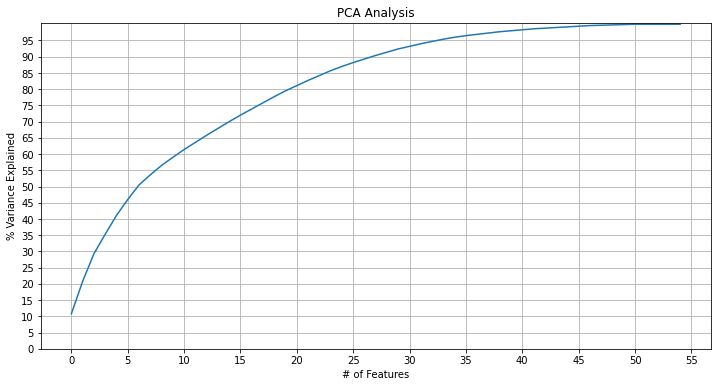

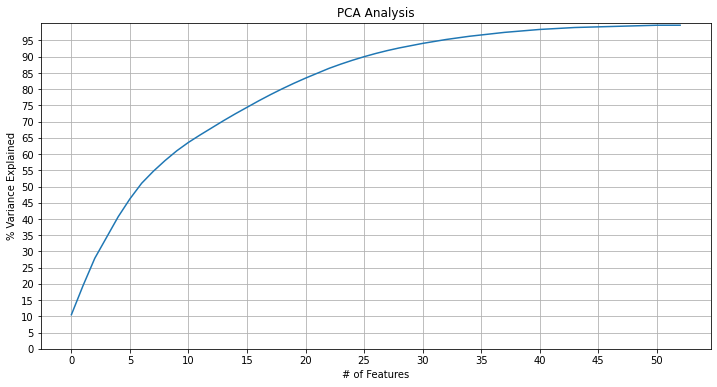

In [197]:
from sklearn.decomposition import PCA

pca = PCA(n_components='mle')
pca.fit(X_train)
variance = pca.explained_variance_ratio_ 
var=np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.xticks(np.arange(0, 100, step=5))
plt.yticks(np.arange(0, 100, step=5))
plt.grid(which='both')
plt.ylim(0,100.5)
plt.plot(var)

pca = PCA(n_components='mle')
pca.fit(X_test)
variance = pca.explained_variance_ratio_ 
var=np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.xticks(np.arange(0, 100, step=5))
plt.yticks(np.arange(0, 100, step=5))
plt.grid()
plt.ylim(0,100.5)
plt.plot(var)

In [198]:
pca = PCA(n_components=3)
pca.fit(df_scale)
pca_scale = pca.transform(df_scale)
pca_df = pd.DataFrame(pca_scale, columns=['pc1', 'pc2', 'pc3'])
print(pca.explained_variance_ratio_)

[0.06388748 0.05290537 0.04724953]


In [199]:
pca = PCA(n_components=30)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

# Machine learning algorithms

In [200]:
print(lm_preds)

[ 9.62097070e+07  7.61374216e+07  8.63818255e+07  3.88596269e+07
  6.58991377e+07  1.12444743e+08  4.87572429e+07  1.17493129e+08
  3.41983097e+07  2.20295772e+07  5.76899344e+07  8.09919443e+07
  1.06300490e+08  1.68244416e+08  6.18277068e+07  1.50663167e+08
  5.02906066e+07  3.95282977e+07  8.41938410e+07  7.72076409e+07
  1.07129424e+08  4.75159421e+07  8.49178661e+07  8.38081260e+07
  7.20103012e+07  6.09304954e+07  9.84938984e+07  4.80740371e+07
  3.26060372e+07  2.26297544e+07  1.06854049e+08  8.57756583e+07
  3.88047130e+07  4.24951109e+07  8.50831785e+07  6.50537972e+07
  6.24580156e+07  9.26092972e+07  9.34914462e+07  7.94432835e+07
  6.87104719e+07  2.51867022e+07  1.01426254e+08  4.87088067e+07
  5.92103928e+07  5.75893135e+07  1.45554462e+08  6.78365191e+07
  1.16000394e+08  1.12253179e+08  1.96749928e+08  6.29501540e+07
  6.00526138e+07  9.74981309e+07  9.87671229e+07  1.02119044e+08
  1.15058393e+08  2.13164744e+07  2.45196422e+07  8.05972608e+07
  1.12244833e+08  4.64152

# Linear Regression

In [201]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
#linear regression
lm = LinearRegression() #our 6th model
print(X_train.shape, y_train.shape)
lm.fit(X_train, y_train)
lm_preds = lm.predict(X_test)


(980, 30) (980,)


In [202]:
y_test_pred = lm_preds
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 51180832.44
Mean squared error = 4098296680977630.0
Median absolute error = 44255843.41
Explain variance score = -0.26
R2 score = -0.26


# Random forest

In [203]:
#random forrest
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(random_state =0, n_estimators=500, max_depth=10)
RF_model.fit(X_train, y_train)

y_hat = RF_model.predict(X_test)
print ("R-Squared is:", metrics.r2_score(y_hat, y_test))

R-Squared is: -4.824593995927903


In [204]:
y_test_pred = y_hat
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 3))

Mean absolute error = 45344218.81
Mean squared error = 3386436875947408.5
Median absolute error = 35668525.78
Explain variance score = -0.04
R2 score = -0.04


# LGB MODEL

In [205]:

params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}

In [206]:
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor(**params, n_estimators = 10000, nthread = 4, n_jobs = -1)

In [207]:
lgb_model.fit(X_train, y_train)
predicted_y = lgb_model.predict(X_test)


[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2


In [208]:
y_test_pred = predicted_y
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 48099932.07
Mean squared error = 3854879891977304.5
Median absolute error = 39887644.12
Explain variance score = -0.18
R2 score = -0.18


# Gradient Boosting Regressor

In [209]:
#Gradient Boosting Regressor
# Fit regression model
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': .01, 'loss': 'ls'} 
clf = ensemble.GradientBoostingRegressor(**params)
predictions2 = clf.fit(X_train,y_train)
training_score = clf.score(X_train, y_train)
print(f"Training Score: {training_score}")

/ext3/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:286: FutureWarning:

The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.



Training Score: 0.7747707177168306


In [210]:
predictions2 = np.expand_dims(clf.predict(X_test), axis = 1)

In [211]:
y_test_pred = predictions2
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 47069243.4
Mean squared error = 3700680131644418.0
Median absolute error = 37512228.61
Explain variance score = -0.14
R2 score = -0.14


In [212]:
#Predictions for the test data
revenue_predictions = clf.predict(X_test)
gbr_predictions = pd.DataFrame(revenue_predictions, columns = ['predicted_revenue'])
gbr_predictions.head()

,predicted_revenue
0,6.915837e+07
1,4.786229e+07
2,6.465661e+07
3,7.788182e+07
4,5.192077e+07


In [213]:
# test_result = pd.concat([X_test, gbr_predictions], axis = 1, sort=True)

# test_result.head()

# SVM

In [214]:
from sklearn.svm import SVR
svm=SVR()
svm.fit(X_train,y_train)
predictions = svm.predict(X_test)

In [215]:
y_test_pred = np.expand_dims(predictions, axis = 1)
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 42673393.79
Mean squared error = 3609497907022058.0
Median absolute error = 28535109.68
Explain variance score = 0.0
R2 score = -0.11


# DT Regressor

In [216]:
from sklearn.tree import DecisionTreeRegressor

dr=DecisionTreeRegressor()
dr.fit(X_train,y_train)
predictions = dr.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 59183814.15 degrees.


In [217]:
y_test_pred = predictions
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 59183814.15
Mean squared error = 6284247934746185.0
Median absolute error = 45116877.5
Explain variance score = -0.93
R2 score = -0.93


# XGBOOST

In [218]:
from xgboost import XGBRegressor
xgboost=XGBRegressor(n_estimators=50)
xgboost.fit(X_train,y_train)
predictions=xgboost.predict(X_test)

In [219]:
y_test_pred = predictions
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 49826162.16
Mean squared error = 4245820052681761.5
Median absolute error = 41309888.5
Explain variance score = -0.3
R2 score = -0.3


# DNN

In [220]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

model = Sequential()

# The Input Layer :
model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               3968      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 168,833
Trainable params: 168,833
Non-trainable params: 0
_________________________________________________________________


In [221]:
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2)
predictions = model.predict(X_test)

Epoch 1/500
25/25 [==============================] - 1s 17ms/step - loss: 78805623.3846 - mean_absolute_error: 78805623.3846 - val_loss: 76089456.0000 - val_mean_absolute_error: 76089456.0000
Epoch 2/500
25/25 [==============================] - 0s 6ms/step - loss: 78725990.1538 - mean_absolute_error: 78725990.1538 - val_loss: 76088192.0000 - val_mean_absolute_error: 76088192.0000
Epoch 3/500
25/25 [==============================] - 0s 5ms/step - loss: 71719606.7692 - mean_absolute_error: 71719606.7692 - val_loss: 76074312.0000 - val_mean_absolute_error: 76074312.0000
Epoch 4/500
25/25 [==============================] - 0s 6ms/step - loss: 77751134.7692 - mean_absolute_error: 77751134.7692 - val_loss: 75994280.0000 - val_mean_absolute_error: 75994280.0000
Epoch 5/500
25/25 [==============================] - 0s 5ms/step - loss: 71819130.1538 - mean_absolute_error: 71819130.1538 - val_loss: 75684760.0000 - val_mean_absolute_error: 75684760.0000
Epoch 6/500
25/25 [=========================

Epoch 44/500
25/25 [==============================] - 0s 6ms/step - loss: 32095330.5385 - mean_absolute_error: 32095330.5385 - val_loss: 33685756.0000 - val_mean_absolute_error: 33685756.0000
Epoch 45/500
25/25 [==============================] - 0s 6ms/step - loss: 31418534.0769 - mean_absolute_error: 31418534.0769 - val_loss: 33657080.0000 - val_mean_absolute_error: 33657080.0000
Epoch 46/500
25/25 [==============================] - 0s 6ms/step - loss: 31190345.0000 - mean_absolute_error: 31190345.0000 - val_loss: 33670004.0000 - val_mean_absolute_error: 33670004.0000
Epoch 47/500
25/25 [==============================] - 0s 6ms/step - loss: 29041246.0000 - mean_absolute_error: 29041246.0000 - val_loss: 33701396.0000 - val_mean_absolute_error: 33701396.0000
Epoch 48/500
25/25 [==============================] - 0s 6ms/step - loss: 30303020.6923 - mean_absolute_error: 30303020.6923 - val_loss: 33655196.0000 - val_mean_absolute_error: 33655196.0000
Epoch 49/500
25/25 [====================

Epoch 87/500
25/25 [==============================] - 0s 5ms/step - loss: 28593716.0000 - mean_absolute_error: 28593716.0000 - val_loss: 33781288.0000 - val_mean_absolute_error: 33781288.0000
Epoch 88/500
25/25 [==============================] - 0s 5ms/step - loss: 27705967.9231 - mean_absolute_error: 27705967.9231 - val_loss: 33878648.0000 - val_mean_absolute_error: 33878648.0000
Epoch 89/500
25/25 [==============================] - 0s 5ms/step - loss: 27205261.7692 - mean_absolute_error: 27205261.7692 - val_loss: 33771456.0000 - val_mean_absolute_error: 33771456.0000
Epoch 90/500
25/25 [==============================] - 0s 5ms/step - loss: 28168027.8462 - mean_absolute_error: 28168027.8462 - val_loss: 33838528.0000 - val_mean_absolute_error: 33838528.0000
Epoch 91/500
25/25 [==============================] - 0s 6ms/step - loss: 28480496.0000 - mean_absolute_error: 28480496.0000 - val_loss: 33873268.0000 - val_mean_absolute_error: 33873268.0000
Epoch 92/500
25/25 [====================

25/25 [==============================] - 0s 6ms/step - loss: 27637861.2308 - mean_absolute_error: 27637861.2308 - val_loss: 33680244.0000 - val_mean_absolute_error: 33680244.0000
Epoch 172/500
25/25 [==============================] - 0s 6ms/step - loss: 25606062.3846 - mean_absolute_error: 25606062.3846 - val_loss: 33817400.0000 - val_mean_absolute_error: 33817400.0000
Epoch 173/500
25/25 [==============================] - 0s 6ms/step - loss: 27232160.5385 - mean_absolute_error: 27232160.5385 - val_loss: 33688952.0000 - val_mean_absolute_error: 33688952.0000
Epoch 174/500
25/25 [==============================] - 0s 5ms/step - loss: 25348747.6154 - mean_absolute_error: 25348747.6154 - val_loss: 33750624.0000 - val_mean_absolute_error: 33750624.0000
Epoch 175/500
25/25 [==============================] - 0s 5ms/step - loss: 26923901.2308 - mean_absolute_error: 26923901.2308 - val_loss: 33730648.0000 - val_mean_absolute_error: 33730648.0000
Epoch 176/500
25/25 [============================

25/25 [==============================] - 0s 5ms/step - loss: 24949047.7692 - mean_absolute_error: 24949047.7692 - val_loss: 33602748.0000 - val_mean_absolute_error: 33602748.0000
Epoch 256/500
25/25 [==============================] - 0s 5ms/step - loss: 26051401.9231 - mean_absolute_error: 26051401.9231 - val_loss: 33740840.0000 - val_mean_absolute_error: 33740840.0000
Epoch 257/500
25/25 [==============================] - 0s 5ms/step - loss: 25676279.1538 - mean_absolute_error: 25676279.1538 - val_loss: 33674888.0000 - val_mean_absolute_error: 33674888.0000
Epoch 258/500
25/25 [==============================] - 0s 5ms/step - loss: 25775600.6923 - mean_absolute_error: 25775600.6923 - val_loss: 33559148.0000 - val_mean_absolute_error: 33559148.0000
Epoch 259/500
25/25 [==============================] - 0s 5ms/step - loss: 26181282.2308 - mean_absolute_error: 26181282.2308 - val_loss: 33729524.0000 - val_mean_absolute_error: 33729524.0000
Epoch 260/500
25/25 [============================

25/25 [==============================] - 0s 6ms/step - loss: 23665201.7692 - mean_absolute_error: 23665201.7692 - val_loss: 34117564.0000 - val_mean_absolute_error: 34117564.0000
Epoch 340/500
25/25 [==============================] - 0s 7ms/step - loss: 23211758.8462 - mean_absolute_error: 23211758.8462 - val_loss: 34180228.0000 - val_mean_absolute_error: 34180228.0000
Epoch 341/500
25/25 [==============================] - 0s 6ms/step - loss: 23932544.5385 - mean_absolute_error: 23932544.5385 - val_loss: 34260176.0000 - val_mean_absolute_error: 34260176.0000
Epoch 342/500
25/25 [==============================] - 0s 6ms/step - loss: 24246967.0000 - mean_absolute_error: 24246967.0000 - val_loss: 34369064.0000 - val_mean_absolute_error: 34369064.0000
Epoch 343/500
25/25 [==============================] - 0s 7ms/step - loss: 24402572.8462 - mean_absolute_error: 24402572.8462 - val_loss: 34312672.0000 - val_mean_absolute_error: 34312672.0000
Epoch 344/500
25/25 [============================

25/25 [==============================] - 0s 5ms/step - loss: 22261927.0000 - mean_absolute_error: 22261927.0000 - val_loss: 34793104.0000 - val_mean_absolute_error: 34793104.0000
Epoch 424/500
25/25 [==============================] - 0s 5ms/step - loss: 22356780.0000 - mean_absolute_error: 22356780.0000 - val_loss: 34669368.0000 - val_mean_absolute_error: 34669368.0000
Epoch 425/500
25/25 [==============================] - 0s 5ms/step - loss: 22427160.6923 - mean_absolute_error: 22427160.6923 - val_loss: 34811016.0000 - val_mean_absolute_error: 34811016.0000
Epoch 426/500
25/25 [==============================] - 0s 5ms/step - loss: 23493904.9231 - mean_absolute_error: 23493904.9231 - val_loss: 34777956.0000 - val_mean_absolute_error: 34777956.0000
Epoch 427/500
25/25 [==============================] - 0s 5ms/step - loss: 23547740.8462 - mean_absolute_error: 23547740.8462 - val_loss: 34795932.0000 - val_mean_absolute_error: 34795932.0000
Epoch 428/500
25/25 [============================

In [222]:
y_test_pred = predictions
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 47891332.93
Mean squared error = 3936919876551447.0
Median absolute error = 36455077.0
Explain variance score = -0.2
R2 score = -0.21


# Reducing Features

**Selected Features: 
'mean_google_trend_popularity', 'tmdb_popularity', 'Drama', 'Adventure', 'Action', 'Budget', 'TwitterScore', 'actors_popularity', 'producer_popularity', 'director_popularity', 'NumTheatres', 'Score_Rotten_Audience', 'Score_Rotten', 'runtimeMinutes', 'imdbNumVotes', 'imdbRating', 'Comedy', 'Rating__3', 'Rating__2', 'release_date_quarter__3', 'release_date_quarter__4', 'release_date_quarter__2', 'Crime', 'Thriller', 'Rating__1', 'Romance', 'Animation', 'Horror', 'Fantasy', 'Sci-Fi', 'Mystery', 'Biography', 'Family'**


In [223]:
#training the model
print(normalized_df.columns)
X = normalized_df.drop(['Revenue'], axis=1)
y= df['Revenue'] #prediction
print(X.shape, y.shape)

Index(['release_date_year__2010', 'release_date_year__2011',
       'release_date_year__2012', 'release_date_year__2013',
       'release_date_year__2014', 'release_date_year__2015',
       'release_date_year__2016', 'release_date_year__2017',
       'release_date_year__2018', 'release_date_year__2019',
       'release_date_year__2020', 'release_date_year__2021',
       'release_date_year__2022', 'Rating__1', 'Rating__2', 'Rating__3',
       'Rating__4', 'Rating__5', 'release_date_quarter__2',
       'release_date_quarter__3', 'release_date_quarter__4', 'tmdb_popularity',
       'imdbRating', 'imdbNumVotes', 'runtimeMinutes', 'Score_Rotten',
       'Score_Rotten_Audience', 'NumTheatres', 'mean_google_trend_popularity',
       'director_popularity', 'producer_popularity', 'actors_popularity',
       'TwitterScore', 'Budget', 'Revenue', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'History', 'H

In [224]:
print(normalized_df.columns)
X = normalized_df.drop(['Revenue'], axis=1)
y= df['Revenue'] #prediction
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
X_movies_train = X_train.copy()
X_movies_test = X_test.copy()
y_movies_train = y_train.copy()
y_movies_test = y_test.copy()
X_train = X_train.drop("Movie Title", axis=1)
X_test = X_test.drop("Movie Title", axis=1)
X_train.drop(X_train.columns.difference(['mean_google_trend_popularity', 'tmdb_popularity', 'Drama', 'Adventure', 'Action', 'Budget', 'TwitterScore', 'actors_popularity', 'producer_popularity', 'director_popularity', 'NumTheatres', 'Score_Rotten_Audience', 'Score_Rotten', 'runtimeMinutes', 'imdbNumVotes', 'imdbRating', 'Comedy', 'Rating__3', 'Rating__2', 'release_date_quarter__3', 'release_date_quarter__4', 'release_date_quarter__2', 'Crime', 'Thriller', 'Rating__1', 'Romance', 'Animation', 'Horror', 'Fantasy', 'Sci-Fi', 'Mystery', 'Biography', 'Family']), 1, inplace=True)
X_test.drop(X_test.columns.difference(['mean_google_trend_popularity', 'tmdb_popularity', 'Drama', 'Adventure', 'Action', 'Budget', 'TwitterScore', 'actors_popularity', 'producer_popularity', 'director_popularity', 'NumTheatres', 'Score_Rotten_Audience', 'Score_Rotten', 'runtimeMinutes', 'imdbNumVotes', 'imdbRating', 'Comedy', 'Rating__3', 'Rating__2', 'release_date_quarter__3', 'release_date_quarter__4', 'release_date_quarter__2', 'Crime', 'Thriller', 'Rating__1', 'Romance', 'Animation', 'Horror', 'Fantasy', 'Sci-Fi', 'Mystery', 'Biography', 'Family']), 1, inplace=True)

Index(['release_date_year__2010', 'release_date_year__2011',
       'release_date_year__2012', 'release_date_year__2013',
       'release_date_year__2014', 'release_date_year__2015',
       'release_date_year__2016', 'release_date_year__2017',
       'release_date_year__2018', 'release_date_year__2019',
       'release_date_year__2020', 'release_date_year__2021',
       'release_date_year__2022', 'Rating__1', 'Rating__2', 'Rating__3',
       'Rating__4', 'Rating__5', 'release_date_quarter__2',
       'release_date_quarter__3', 'release_date_quarter__4', 'tmdb_popularity',
       'imdbRating', 'imdbNumVotes', 'runtimeMinutes', 'Score_Rotten',
       'Score_Rotten_Audience', 'NumTheatres', 'mean_google_trend_popularity',
       'director_popularity', 'producer_popularity', 'actors_popularity',
       'TwitterScore', 'Budget', 'Revenue', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'History', 'H

/state/partition1/job-18980707/ipykernel_1539304/548681074.py:12: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/state/partition1/job-18980707/ipykernel_1539304/548681074.py:13: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [225]:
print(len(X_train.columns), len(X_test.columns))
X_train.columns

33 33


Index(['Rating__1', 'Rating__2', 'Rating__3', 'release_date_quarter__2',
       'release_date_quarter__3', 'release_date_quarter__4', 'tmdb_popularity',
       'imdbRating', 'imdbNumVotes', 'runtimeMinutes', 'Score_Rotten',
       'Score_Rotten_Audience', 'NumTheatres', 'mean_google_trend_popularity',
       'director_popularity', 'producer_popularity', 'actors_popularity',
       'TwitterScore', 'Budget', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Horror',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller'],
      dtype='object')

# Machine learning algorithms

# Linear Regression

In [226]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
#linear regression
lm = LinearRegression() #our 6th model
print(X_train.shape, y_train.shape)
lm.fit(X_train, y_train)
lm_preds = lm.predict(X_test)


(980, 33) (980,)


In [227]:
y_test_pred = lm_preds
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 29870728.79
Mean squared error = 1625260830685935.8
Median absolute error = 22115812.24
Explain variance score = 0.5
R2 score = 0.5


# Random forest

In [228]:
#random forrest
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(random_state =0, n_estimators=500, max_depth=10)
RF_model.fit(X_train, y_train)

y_hat = RF_model.predict(X_test)
print ("R-Squared is:", metrics.r2_score(y_hat, y_test))

R-Squared is: 0.09760251462732739


In [229]:
y_test_pred = y_hat
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 26384781.12
Mean squared error = 1389802880824242.0
Median absolute error = 19193427.15
Explain variance score = 0.57
R2 score = 0.57


# LGB MODEL

In [230]:

params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}

In [231]:
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor(**params, n_estimators = 10000, nthread = 4, n_jobs = -1)

In [232]:
lgb_model.fit(X_train, y_train)
predicted_y = lgb_model.predict(X_test)


[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2


In [233]:
y_test_pred = predicted_y
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 27398160.28
Mean squared error = 1511809320774502.8
Median absolute error = 19321191.71
Explain variance score = 0.54
R2 score = 0.54


# Gradient Boosting Regressor

In [234]:
#Gradient Boosting Regressor
# Fit regression model
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': .01, 'loss': 'ls'} 
clf = ensemble.GradientBoostingRegressor(**params)
predictions2 = clf.fit(X_train,y_train)
training_score = clf.score(X_train, y_train)
print(f"Training Score: {training_score}")

/ext3/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:286: FutureWarning:

The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.



Training Score: 0.8193519673134436


In [235]:
predictions2 = np.expand_dims(clf.predict(X_test), axis = 1)
y_test_pred = predictions2
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 25802116.01
Mean squared error = 1352839960049164.0
Median absolute error = 18020679.27
Explain variance score = 0.59
R2 score = 0.58


In [236]:
#Predictions for the test data
revenue_predictions = clf.predict(X_test)
gbr_predictions = pd.DataFrame(revenue_predictions, columns = ['predicted_revenue'])
gbr_predictions.head()

,predicted_revenue
0,6.010529e+07
1,4.596818e+07
2,5.387245e+07
3,4.845826e+07
4,6.320164e+07


In [237]:
test_result = pd.concat([X_test, gbr_predictions], axis = 1, sort=True)

test_result.head()

,Rating__1,Rating__2,Rating__3,release_date_quarter__2,release_date_quarter__3,release_date_quarter__4,tmdb_popularity,imdbRating,imdbNumVotes,runtimeMinutes,...,Crime,Drama,Family,Fantasy,Horror,Mystery,Romance,Sci-Fi,Thriller,predicted_revenue
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.010529e+07
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.596818e+07
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.387245e+07
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.845826e+07
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.320164e+07


# SVM

In [238]:
from sklearn.svm import SVR
svm=SVR()
svm.fit(X_train,y_train)
predictions = svm.predict(X_test)

In [239]:
y_test_pred = np.expand_dims(predictions, axis = 1)
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 42673391.06
Mean squared error = 3609497567844304.0
Median absolute error = 28535108.66
Explain variance score = 0.0
R2 score = -0.11


# DT Regressor

In [240]:
from sklearn.tree import DecisionTreeRegressor

dr=DecisionTreeRegressor()
dr.fit(X_train,y_train)
predictions = dr.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 39021948.07 degrees.


In [241]:
y_test_pred = predictions
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 39021948.07
Mean squared error = 3178783120247389.5
Median absolute error = 23991677.5
Explain variance score = 0.03
R2 score = 0.02


# XGBOOST

In [242]:
from xgboost import XGBRegressor
xgboost=XGBRegressor(n_estimators=50)
xgboost.fit(X_train,y_train)
predictions=xgboost.predict(X_test)

In [243]:
y_test_pred = predictions
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 27943353.86
Mean squared error = 1519592576557992.0
Median absolute error = 19875238.0
Explain variance score = 0.53
R2 score = 0.53


# DNN

In [244]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

model = Sequential()

# The Input Layer :
model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               4352      
_________________________________________________________________
dense_11 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 257       
Total params: 169,217
Trainable params: 169,217
Non-trainable params: 0
_________________________________________________________________


In [245]:
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2)
predictions = model.predict(X_test)

Epoch 1/500
25/25 [==============================] - 1s 26ms/step - loss: 77519232.9231 - mean_absolute_error: 77519232.9231 - val_loss: 76089432.0000 - val_mean_absolute_error: 76089432.0000
Epoch 2/500
25/25 [==============================] - 0s 9ms/step - loss: 74708565.8462 - mean_absolute_error: 74708565.8462 - val_loss: 76085648.0000 - val_mean_absolute_error: 76085648.0000
Epoch 3/500
25/25 [==============================] - 0s 5ms/step - loss: 73152143.6923 - mean_absolute_error: 73152143.6923 - val_loss: 76032888.0000 - val_mean_absolute_error: 76032888.0000
Epoch 4/500
25/25 [==============================] - 0s 5ms/step - loss: 73880549.2308 - mean_absolute_error: 73880549.2308 - val_loss: 75688784.0000 - val_mean_absolute_error: 75688784.0000
Epoch 5/500
25/25 [==============================] - 0s 5ms/step - loss: 75579865.8462 - mean_absolute_error: 75579865.8462 - val_loss: 74281304.0000 - val_mean_absolute_error: 74281304.0000
Epoch 6/500
25/25 [=========================

Epoch 44/500
25/25 [==============================] - 0s 5ms/step - loss: 37067842.6154 - mean_absolute_error: 37067842.6154 - val_loss: 38501816.0000 - val_mean_absolute_error: 38501816.0000
Epoch 45/500
25/25 [==============================] - 0s 5ms/step - loss: 38380877.8462 - mean_absolute_error: 38380877.8462 - val_loss: 38368568.0000 - val_mean_absolute_error: 38368568.0000
Epoch 46/500
25/25 [==============================] - 0s 5ms/step - loss: 34326221.3846 - mean_absolute_error: 34326221.3846 - val_loss: 38216468.0000 - val_mean_absolute_error: 38216468.0000
Epoch 47/500
25/25 [==============================] - 0s 5ms/step - loss: 36074627.6923 - mean_absolute_error: 36074627.6923 - val_loss: 38104296.0000 - val_mean_absolute_error: 38104296.0000
Epoch 48/500
25/25 [==============================] - 0s 6ms/step - loss: 35509529.5385 - mean_absolute_error: 35509529.5385 - val_loss: 37948880.0000 - val_mean_absolute_error: 37948880.0000
Epoch 49/500
25/25 [====================

Epoch 87/500
25/25 [==============================] - 0s 5ms/step - loss: 31475718.8462 - mean_absolute_error: 31475718.8462 - val_loss: 32208822.0000 - val_mean_absolute_error: 32208822.0000
Epoch 88/500
25/25 [==============================] - 0s 5ms/step - loss: 29333405.6154 - mean_absolute_error: 29333405.6154 - val_loss: 32157270.0000 - val_mean_absolute_error: 32157270.0000
Epoch 89/500
25/25 [==============================] - 0s 5ms/step - loss: 30419475.8462 - mean_absolute_error: 30419475.8462 - val_loss: 32051992.0000 - val_mean_absolute_error: 32051992.0000
Epoch 90/500
25/25 [==============================] - 0s 5ms/step - loss: 30179185.5385 - mean_absolute_error: 30179185.5385 - val_loss: 31949582.0000 - val_mean_absolute_error: 31949582.0000
Epoch 91/500
25/25 [==============================] - 0s 5ms/step - loss: 30035321.3846 - mean_absolute_error: 30035321.3846 - val_loss: 31882268.0000 - val_mean_absolute_error: 31882268.0000
Epoch 92/500
25/25 [====================

25/25 [==============================] - ETA: 0s - loss: 26703502.8182 - mean_absolute_error: 26703502.818 - 0s 9ms/step - loss: 26731569.0769 - mean_absolute_error: 26731569.0769 - val_loss: 29878360.0000 - val_mean_absolute_error: 29878360.0000
Epoch 172/500
25/25 [==============================] - 0s 7ms/step - loss: 25239196.1538 - mean_absolute_error: 25239196.1538 - val_loss: 29927272.0000 - val_mean_absolute_error: 29927272.0000
Epoch 173/500
25/25 [==============================] - 0s 5ms/step - loss: 28978087.6923 - mean_absolute_error: 28978087.6923 - val_loss: 29893976.0000 - val_mean_absolute_error: 29893976.0000
Epoch 174/500
25/25 [==============================] - 0s 6ms/step - loss: 27210476.4615 - mean_absolute_error: 27210476.4615 - val_loss: 29896280.0000 - val_mean_absolute_error: 29896280.0000
Epoch 175/500
25/25 [==============================] - 0s 7ms/step - loss: 27520048.3077 - mean_absolute_error: 27520048.3077 - val_loss: 29889040.0000 - val_mean_absolute_er

25/25 [==============================] - 0s 5ms/step - loss: 24275214.5385 - mean_absolute_error: 24275214.5385 - val_loss: 29851904.0000 - val_mean_absolute_error: 29851904.0000
Epoch 256/500
25/25 [==============================] - 0s 5ms/step - loss: 25524750.7692 - mean_absolute_error: 25524750.7692 - val_loss: 29772688.0000 - val_mean_absolute_error: 29772688.0000
Epoch 257/500
25/25 [==============================] - 0s 5ms/step - loss: 24773620.6923 - mean_absolute_error: 24773620.6923 - val_loss: 29802908.0000 - val_mean_absolute_error: 29802908.0000
Epoch 258/500
25/25 [==============================] - 0s 5ms/step - loss: 25184045.4615 - mean_absolute_error: 25184045.4615 - val_loss: 29794776.0000 - val_mean_absolute_error: 29794776.0000
Epoch 259/500
25/25 [==============================] - 0s 5ms/step - loss: 25117353.8462 - mean_absolute_error: 25117353.8462 - val_loss: 29817512.0000 - val_mean_absolute_error: 29817512.0000
Epoch 260/500
25/25 [============================

25/25 [==============================] - 0s 6ms/step - loss: 26218475.6923 - mean_absolute_error: 26218475.6923 - val_loss: 30026556.0000 - val_mean_absolute_error: 30026556.0000
Epoch 340/500
25/25 [==============================] - 0s 6ms/step - loss: 25198910.5385 - mean_absolute_error: 25198910.5385 - val_loss: 30062268.0000 - val_mean_absolute_error: 30062268.0000
Epoch 341/500
25/25 [==============================] - 0s 5ms/step - loss: 24392147.7692 - mean_absolute_error: 24392147.7692 - val_loss: 30075216.0000 - val_mean_absolute_error: 30075216.0000
Epoch 342/500
25/25 [==============================] - 0s 5ms/step - loss: 25469768.0769 - mean_absolute_error: 25469768.0769 - val_loss: 30040654.0000 - val_mean_absolute_error: 30040654.0000
Epoch 343/500
25/25 [==============================] - 0s 5ms/step - loss: 23864977.0000 - mean_absolute_error: 23864977.0000 - val_loss: 30044426.0000 - val_mean_absolute_error: 30044426.0000
Epoch 344/500
25/25 [============================

25/25 [==============================] - 0s 6ms/step - loss: 24530888.0000 - mean_absolute_error: 24530888.0000 - val_loss: 30451804.0000 - val_mean_absolute_error: 30451804.0000
Epoch 424/500
25/25 [==============================] - 0s 6ms/step - loss: 24163269.3846 - mean_absolute_error: 24163269.3846 - val_loss: 30380512.0000 - val_mean_absolute_error: 30380512.0000
Epoch 425/500
25/25 [==============================] - 0s 6ms/step - loss: 24274694.6154 - mean_absolute_error: 24274694.6154 - val_loss: 30445200.0000 - val_mean_absolute_error: 30445200.0000
Epoch 426/500
25/25 [==============================] - 0s 6ms/step - loss: 24329547.3077 - mean_absolute_error: 24329547.3077 - val_loss: 30421700.0000 - val_mean_absolute_error: 30421700.0000
Epoch 427/500
25/25 [==============================] - 0s 6ms/step - loss: 23724396.9231 - mean_absolute_error: 23724396.9231 - val_loss: 30387612.0000 - val_mean_absolute_error: 30387612.0000
Epoch 428/500
25/25 [============================

In [246]:
y_test_pred = predictions
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 26335464.13
Mean squared error = 1521629173153016.8
Median absolute error = 15962080.0
Explain variance score = 0.55
R2 score = 0.53
